# Loan Default Prediction on Imbalanced Dataset Using Classification Machine Learning Model
Name : LEE XIN YANG

Email: leexinyang@gmail.com

Time taken: 70 hours

# Table of Contents
* [Problem](#Problem)
* [Aim](#Aim)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Join loan and payment csv](#Join-loan-and-payment-csv)
    * [Exploring Joined dataset](#Exploring-Joined-dataset)
    * [Merge the joined dataset with clarity dataset.](#Merge-the-joined-dataset-with-clarity-dataset.)
    * [Create a new dataset to consists of approved and fully funded loans only.](#Create-a-new-dataset-to-consist-of-approved-and-fully-funded-loans-only.)
    * [Missing values in the Dataset](#Missing-values-in-the-Dataset)
* [Data Pre-processing](#DATA-PRE-PROCESSING)
    * [Remove features with 80% of missing values](#Remove-features-with-80%-of-missing-values.)
    * [Remove features](#Remove-features)
    * [Assign features in the dataset to numerical features, categorical features and other features](#Assign-features-in-the-dataset-to-numerical-features,-categorical-features-and-other-features)
    * [Impute missing values in each feature set](#Impute-missing-values-in-each-feature-set)
* [Feature Engineering](#Feature-Engineering)
    * [Create a new feature - "days_to_process"](#Create-a-new-feature---"days_to_process")
    * [Create Target Variable](#Create-Target-Variable)
* [Data Pre-processing - Standardizing and Encoding the Features](#Data-Pre-processing---Standardizing-and-Encoding-the-Features)
    * [Standarizing the numerical columns using RobustScaler](#Standarizing-the-numerical-columns-using-RobustScaler.)
    * [Encode Categorical Features using one hot encoding](#Encode-Categorical-Features-using-one-hot-encoding.)
* [Feature Analysis](#Feature-Analysis)
    * [Standarizing-the-numerical-columns-using-RobustScaler](#Correlation-Heatmap-for-Numerical-Features)
* [Prepare the dataset for Training Machine Learning Models](#Prepare-the-Dataset-for-Training-Machine-Learning-Models)
* [Machine Learning Model Part](#Machine-Learning-Model-Part)
    * [Performance Metric to Consider](#Performance-Metric-to-Consider)
    * [Building Classification Machine Learning Model](#Building-Classification-Machine-Learning-Model)
* [Conclusion](#Conclusion)

# Problem
According to the findings of exploratory data analysis, the payback rate for approved loans is low, it is 31.1% only.

# Aim
* To reduce losses incurred by MoneyLion when the company approves a loan that has high risk to be defaulted. 
* Build a classification machine learning model to predict the defaulted loan on approved loans. 

In [1]:
# load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
loan = pd.read_csv('loan.csv')
clarity = pd.read_csv('clarity_underwriting_variables.csv')
payment = pd.read_csv("payment.csv")

/tmp/ipykernel_1591/277715252.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  clarity = pd.read_csv('clarity_underwriting_variables.csv')


In [3]:
loan.head()

loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   

              applicationDate  originated              originatedDate  \
0  2016-02-23T17:29:01.940000       False                         NaN   
1  2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2  2016-08-01T13:51:14.709000       False                         NaN   
3  2015-08-06T23:58:08.880000       False                         NaN   
4  2016-06-05T22:31:34.304000       False                         NaN   

   nPaidOff  approved  isFunded             loanStatus  loanAmount  \
0       0.0     False         0  Withdrawn Application       500.0   
1       0.0      True         1          Paid Off Loan      3000.0   
2       0.0     False         0  Withdrawn Application       400.0   
3       0.0     False         0  Withdrawn Application       500.0   
4       0.0     False         0               Rejected       350.0   

   originallyScheduledPaymentAmount state     leadType  leadCost fpStatus  \
0                            978.27    IL  bvMandatory         6      NaN   
1                           6395.19    CA    prescreen         0  Checked   
2                           1199.45    MO  bvMandatory         3      NaN   
3                           1074.05    IL  bvMandatory         3      NaN   
4                            814.37    NV  bvMandatory         3      NaN   

             clarityFraudId  hasCF  
0  5669ef78e4b0c9d3936440e6      1  
1  569eb3a3e4b096699f685d64      1  
2  579eab11e4b0d0502870ef2f      1  
3  555b1e95e4b0f6f11b267c18      1  
4  5754a91be4b0c6a2bf424772      1

In [4]:
clarity.head()

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                                8.0                     
1                                                5.0                     
2                                                9.0                     
3                                                3.0                     
4                                                5.0                     

   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                2.0                          
1                                                2.0                          
2                                                4.0                          
3                                                2.0                          
4                                                5.0                          

   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  \
0                                                2.0                    
1                                                2.0                    
2                                                2.0                    
3                                                2.0                    
4                                                2.0                    

   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago  \
0                                                2.0                  
1                                                2.0                  
2                                                3.0                  
3                                                2.0                  
4                                                2.0                  

   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago  \
0                                                8.0                     
1                                               11.0                     
2                                               10.0                     
3                                                9.0                     
4                                                6.0                     

   .underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago  \
0                                                2.0                    
1                                                2.0                    
2                                                8.0                    
3                                                2.0                    
4                                                5.0                    

   .underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago  \
0                                                2.0                     
1                                                2.0                     
2                                                2.0                     
3                                                2.0                     
4                                                2.0                     

   .underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago  \
0                                                5.0                      
1                                                4.0                      
2                                                9.0                      
3                                                2.0                      
4                                                5.0                      

   .underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago  \
0                                               10.0                             
1                                               21.0                             
2                                               25.0                             
3                                                9.0                             
4                          

In [5]:
payment.head()

loanId  installmentIndex  isCollection          paymentDate  \
0  LL-I-00000021                 1         False  2014-12-19T05:00:00   
1  LL-I-00000021                 2         False  2015-01-02T05:00:00   
2  LL-I-00000021                 3         False  2015-01-16T05:00:00   
3  LL-I-00000021                 4         False  2015-01-30T05:00:00   
4  LL-I-00000021                 5         False  2015-02-13T05:00:00   

   principal    fees  paymentAmount paymentStatus paymentReturnCode  
0      22.33  147.28         169.61       Checked               NaN  
1      26.44  143.17         169.61       Checked               NaN  
2      31.30  138.31         169.61       Checked               NaN  
3      37.07  132.54         169.61       Checked               NaN  
4      43.89  125.72         169.61       Checked               NaN

# Exploratory Data Analysis

## Join loan and payment csv

In [6]:
joined = loan.merge(payment, 
                    left_on='loanId', 
                    right_on='loanId', 
                    how='left')

In [7]:
joined.info()
joined.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227094 entries, 0 to 1227093
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   loanId                            1226838 non-null  object 
 1   anon_ssn                          1227094 non-null  object 
 2   payFrequency                      1225821 non-null  object 
 3   apr                               1223172 non-null  float64
 4   applicationDate                   1227094 non-null  object 
 5   originated                        1227094 non-null  bool   
 6   originatedDate                    695209 non-null   object 
 7   nPaidOff                          1226708 non-null  float64
 8   approved                          1227094 non-null  bool   
 9   isFunded                          1227094 non-null  int64  
 10  loanStatus                        1226703 non-null  object 
 11  loanAmount                        122

(1227094, 27)

## Exploring Joined dataset

In [8]:
joined[(joined['isFunded']==1) & (joined['approved']==True)]

loanId                          anon_ssn payFrequency    apr  \
1        LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2        LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
3        LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
4        LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
5        LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
...                ...                               ...          ...    ...   
1227070  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
1227071  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
1227072  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
1227073  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
1227074  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                    applicationDate  originated              originatedDate  \
1        2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2        2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
3        2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
4        2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
5        2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
...                             ...         ...                         ...   
1227070  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
1227071  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
1227072  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
1227073  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
1227074  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   

         nPaidOff  approved  isFunded  ...            clarityFraudId  hasCF  \
1             0.0      True         1  ...  569eb3a3e4b096699f685d64      1   
2             0.0      True         1  ...  569eb3a3e4b096699f685d64      1   
3             0.0      True         1  ...  569eb3a3e4b096699f685d64      1   
4             0.0      True         1  ...  569eb3a3e4b096699f685d64      1   
5             0.0      True         1  ...  569eb3a3e4b096699f685d64      1   
...           ...       ...       ...  ...                       ...    ...   
1227070       0.0      True         1  ...  5840ad86e4b0bb9d6980127f      1   
1227071       0.0      True         1  ...  5840ad86e4b0bb9d6980127f      1   
1227072       0.0      True         1  ...  5840ad86e4b0bb9d6980127f      1   
1227073       0.0      True         1  ...  5840ad86e4b0bb9d6980127f      1   
1227074       0.0      True         1  ...  5840ad86e4b0bb9d6980127f      1   

         installmentIndex isCollection          paymentDate  principal  \
1                     1.0        False  2016-01-27T05:00:00     151.98   
2                     2.0        False  2016-02-10T05:00:00      49.08   
3                     3.0        False  2016-02-24T05:00:00      52.83   
4                     4.0        False  2016-03-09T05:00:00      56.86   
5                     5.0        False  2016-03-23T04:00:00      61.20   
...                   ...          ...                  ...        ...   
1227070              23.0        False  2017-05-25T04:00:00      21.85   
1227071              24.0        False  2017-06-01T04:00:00      24.56   
1227072              25.0        False  2017-06-08T04:00:00      27.59   
1227073              26.0        False  2017-06-15T04:00:00      31.01   
1227074              27.0        False  2017-06-22T04:00:00      35.46   

           fees paymentAmount  paymentStatus  paymentReturnCode  
1        114.49        266.47        Checked                NaN  
2        217.39        266.47        Checked                NaN  
3        213.64        266.47        Checked                NaN  
4   

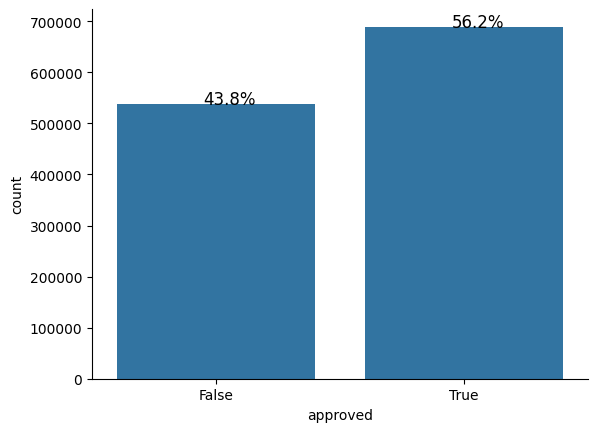

Percentage of approved and ultimately funded loans is: 56.2%


In [9]:
ax = sns.countplot(x=joined['approved']==True)
total = len(joined)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Show plot
sns.despine()
plt.show()
print('Percentage of approved and ultimately funded loans is:', percentage)

## Merge the joined dataset with clarity dataset.

In [10]:
joined = joined.merge(clarity, 
                    left_on='clarityFraudId', 
                    right_on='underwritingid', 
                    how='left')

In [11]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227094 entries, 0 to 1227093
Data columns (total 81 columns):
 #   Column                                                                                               Non-Null Count    Dtype  
---  ------                                                                                               --------------    -----  
 0   loanId                                                                                               1226838 non-null  object 
 1   anon_ssn                                                                                             1227094 non-null  object 
 2   payFrequency                                                                                         1225821 non-null  object 
 3   apr                                                                                                  1223172 non-null  float64
 4   applicationDate                                                                           

In [12]:
joined.shape

(1227094, 81)

## Create a new dataset to consist of approved and fully funded loans only. 

In [13]:
# Filter the data to consist of approved and fully funded loans only
approved_only = joined[(joined['isFunded'] == 1) & (joined['approved'] == True)]
approved_only.shape

(671882, 81)

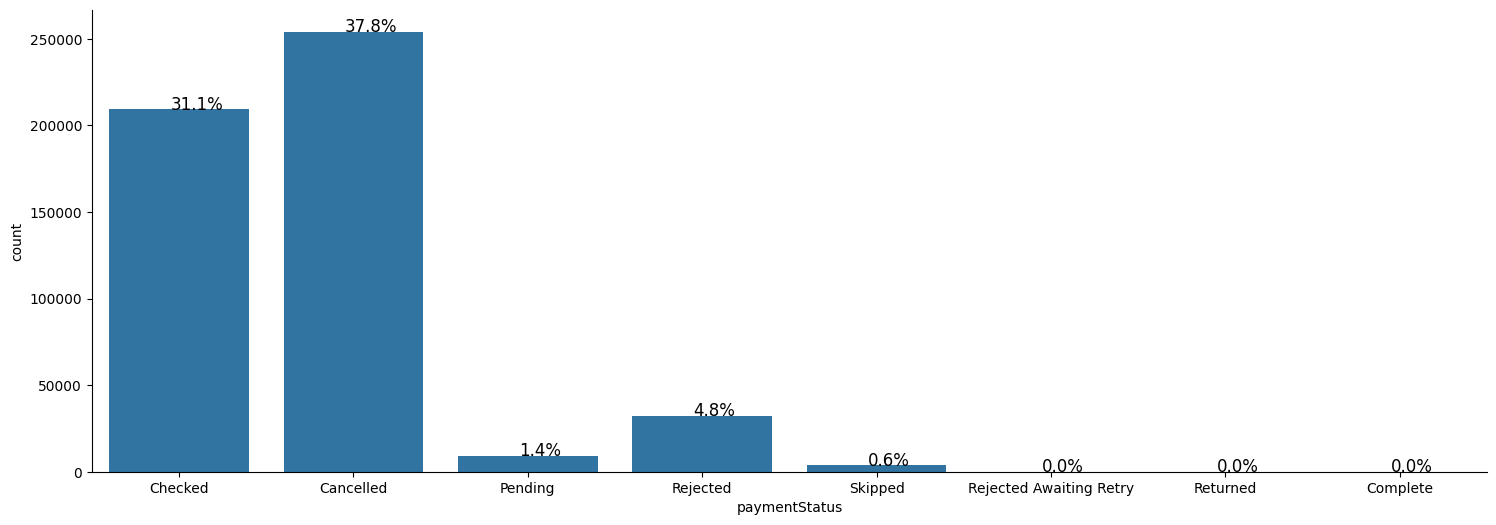

In [14]:
plt.figure(figsize=(18,6))

# Create count plot with percentages
ax = sns.countplot(x=approved_only['paymentStatus'])
total = len(approved_only)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Show plot
sns.despine()
plt.show()

* The payback rate is 31.1% only which is not ideal.
* 24.3% of payment status is None, and this payment status indicates that the payment has been scheduled to be processed on a future date, but no attempt has been made to process the payment yet. Thus, part of the "None" payment could be successful or unsuccessful.
* Nonetheless, the payback rate is low. We can tackle this issue by identifying loan with low payback rate and mark them as high risk.

In [15]:
# Get columns with numeric values and more than two unique values
numeric_cols = [col for col in approved_only.select_dtypes(include=['float', 'int']).columns if approved_only[col].nunique() > 2]
print(numeric_cols)

['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'installmentIndex', 'principal', 'fees', 'paymentAmount', '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago', '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators', '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount', '.underwritingdataclarity.clear

Plotting box plot for these numerical features: ['nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'installmentIndex', 'principal', 'fees', 'paymentAmount', 'clearfraudscore']


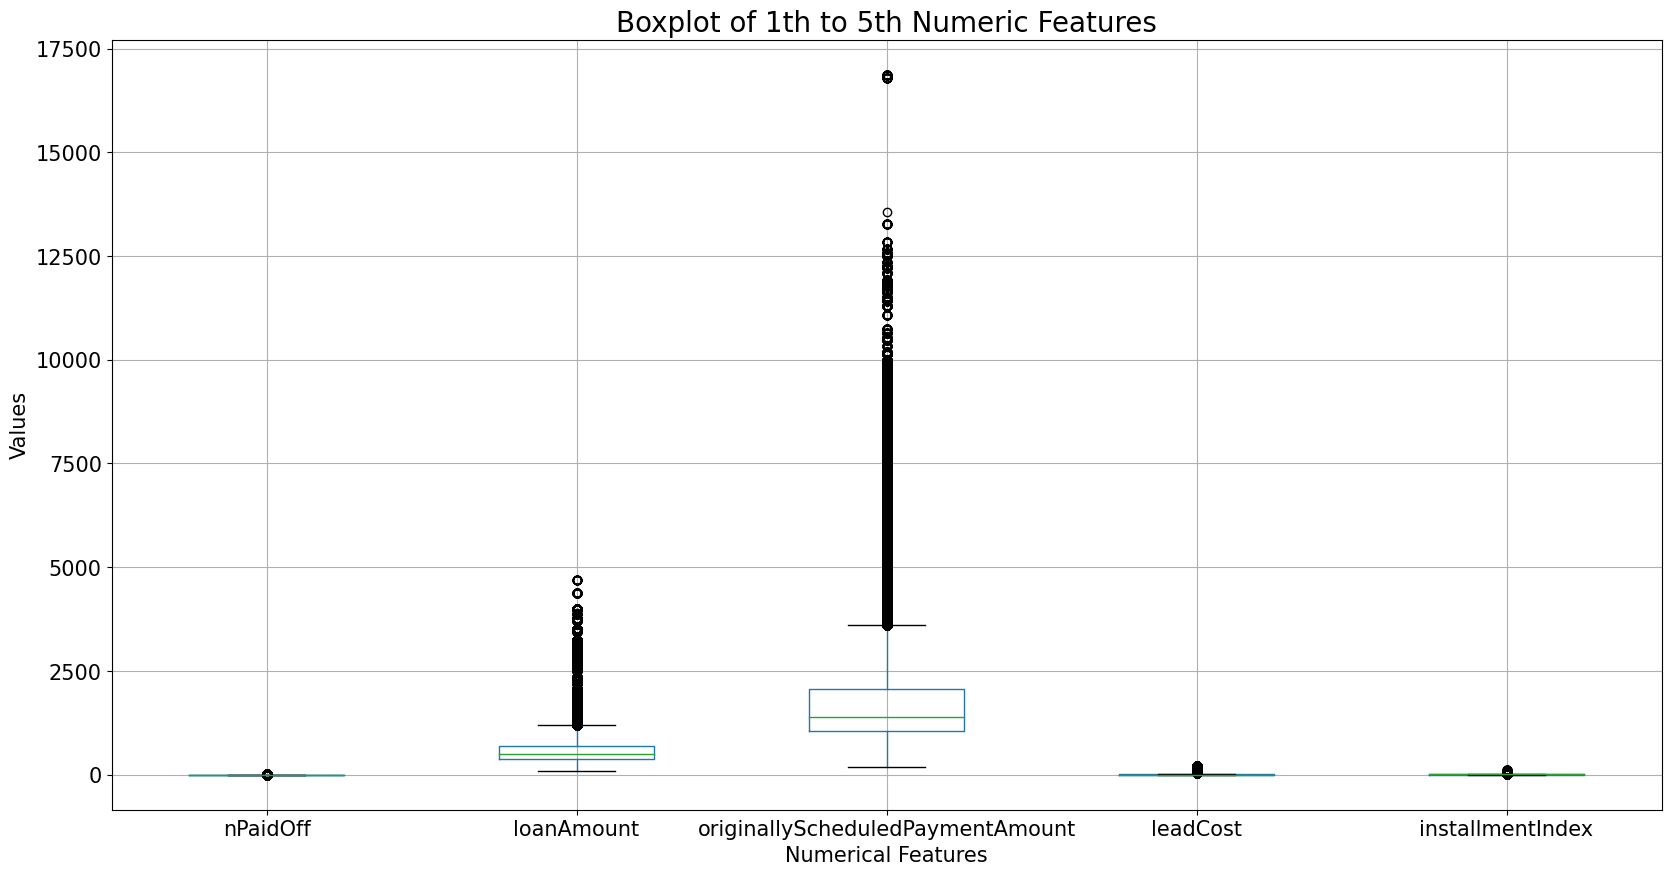

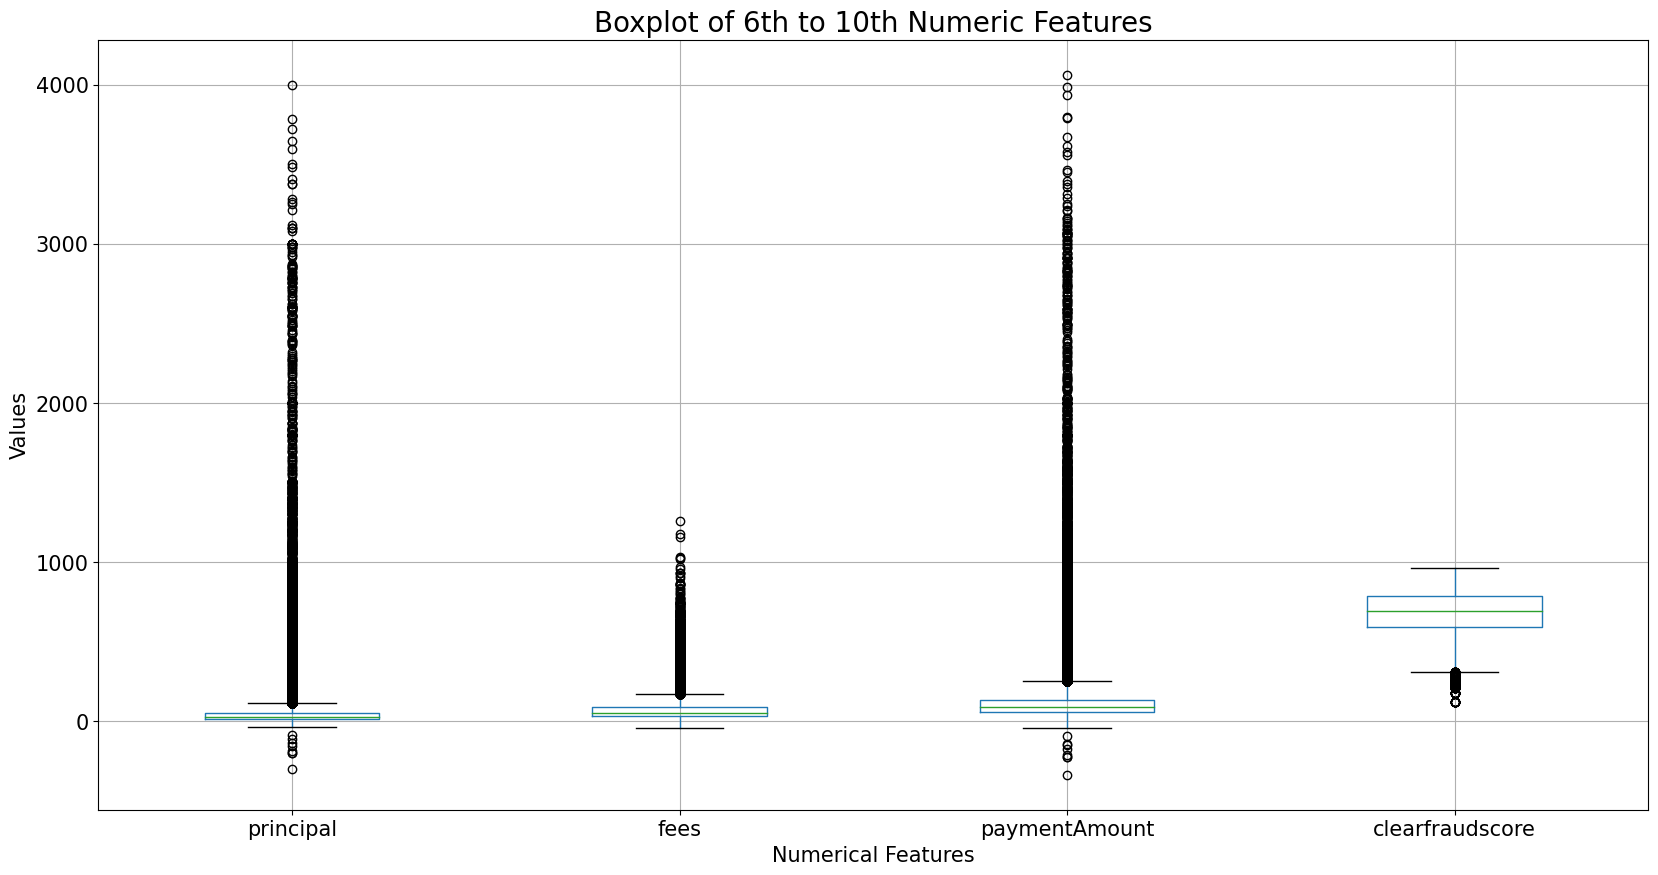

In [16]:
print('Plotting box plot for these numerical features:', numeric_cols[1:9]+numeric_cols[21:22]) #clearfraudscore)

#Define a function to sort the numerical features into different boxplots
def plot_numeric_cols(data, numeric_cols, num_cols_per_plot):
    num_plots = (len(numeric_cols) + num_cols_per_plot - 1) // num_cols_per_plot
    for i in range(num_plots):
        start_idx = i * num_cols_per_plot
        end_idx = (i+1) * num_cols_per_plot
        cols_to_plot = numeric_cols[start_idx:end_idx]
        plt.figure(figsize=(20, 10))
        data[cols_to_plot].boxplot()
        plt.title(f'Boxplot of {start_idx+1}th to {end_idx}th Numeric Features', fontsize=20)
        plt.xlabel('Numerical Features', fontsize=15)
        plt.ylabel('Values', fontsize=15)
        plt.tick_params(axis='both', labelsize=15)
        plt.show()
        
plot_numeric_cols(approved_only, numeric_cols[1:9]+numeric_cols[21:22],5)

As shown in the above boxplot, most of the numerical features have high number of outliers/ heavily skwed.

## Missing values in the Dataset

In [17]:
# Set display options to show all columns
print("Number of NaN values in approved_only dataset: ", approved_only.isna().sum().sum())

Number of NaN values in approved_only dataset:  11338803


# DATA PRE-PROCESSING

### Remove features with 80% of missing values.

In [18]:
approved_only = approved_only.dropna(thresh=(0.2 * len(approved_only)), axis=1)
print("Number of NaN values in approved_only dataset: ", approved_only.isna().sum().sum())
print("Number of rows and features in the dataset = ", approved_only.shape[:2])

Number of NaN values in approved_only dataset:  6409228
Number of rows and features in the dataset =  (671882, 73)


In [19]:
approved_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671882 entries, 1 to 1227074
Data columns (total 73 columns):
 #   Column                                                                                             Non-Null Count   Dtype  
---  ------                                                                                             --------------   -----  
 0   loanId                                                                                             671882 non-null  object 
 1   anon_ssn                                                                                           671882 non-null  object 
 2   payFrequency                                                                                       671882 non-null  object 
 3   apr                                                                                                671882 non-null  float64
 4   applicationDate                                                                                    671882 non-null

### Remove features
1) Remove 'approved' and 'isFunded' because because the dataset now only consists of approved and fully funded loans.
2) Remove 'clarityFraudId', 'loanId' and 'underwritingid' as they are unique identifiers of the datasets. This can help to reduce the dimensionality of the dataset.
3) Remove 'anon_ssn' as it is hash ID and meaningless.
4) Drop 'principal' and 'fees' because the sum of these values already recorded in 'paymentAmount'.

In [20]:
removed_cols = ['approved','isFunded','clarityFraudId', 'underwritingid','loanId','anon_ssn','principal','fees']
approved_only.drop(columns = removed_cols, axis =1, inplace=True)
approved_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671882 entries, 1 to 1227074
Data columns (total 65 columns):
 #   Column                                                                                             Non-Null Count   Dtype  
---  ------                                                                                             --------------   -----  
 0   payFrequency                                                                                       671882 non-null  object 
 1   apr                                                                                                671882 non-null  float64
 2   applicationDate                                                                                    671882 non-null  object 
 3   originated                                                                                         671882 non-null  bool   
 4   originatedDate                                                                                     671882 non-null

### Assign features in the dataset to numerical features, categorical features and other features

Numerical features:

In [21]:
numeric_feature = [col for col in approved_only.select_dtypes(include=['float', 'int']).columns if approved_only[col].nunique() > 2]
print(numeric_feature)
print (len(numeric_feature))

['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'installmentIndex', 'paymentAmount', '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago', '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators', '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount', '.underwritingdataclarity.clearfraud.clearfraudident

Categorical features (categorical features with 2 classes):

In [22]:
categ_feature = [col for col in approved_only.columns if approved_only[col].nunique() <= 2]
print(categ_feature)
print (len(categ_feature))

['originated', 'hasCF', 'isCollection', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict', '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk', '.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother', '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified', '.underwritingdataclarity.clearfraud.clearfraudindicator.inq

Other features (categorical features with more than 2 classes):

In [23]:
rest_feature = set(approved_only) - set(numeric_feature+categ_feature)
print(rest_feature)
print(len(rest_feature))

{'paymentStatus', 'applicationDate', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult', 'fpStatus', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch', 'leadType', 'originatedDate', 'paymentDate', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription', 'state', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch', 'loanStatus', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype', 'payFrequency', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch'}
16


### Impute missing values in each feature set
* For numerical features, missing values will be filled with median values because most of the numerical features has non-normal distribution and many outliers. Filling median as missing values can preserve the distribution.

In [24]:
for col in rest_feature:
    mode = approved_only[col].mode()[0]
    approved_only[col].fillna(mode, inplace=True)

print(approved_only[list(rest_feature)].isna().sum())

for col in numeric_feature:
    median = approved_only[col].median()
    approved_only[col].fillna(median, inplace=True)

print(approved_only[list(numeric_feature)].isna().sum())
    
for col in categ_feature:
    mode_categ = approved_only[col].mode()[0]
    approved_only[col].fillna(mode_categ, inplace=True)

print(approved_only[list(categ_feature)].isna().sum())

paymentStatus                                                                                   0
applicationDate                                                                                 0
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult           0
fpStatus                                                                                        0
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch                  0
leadType                                                                                        0
originatedDate                                                                                  0
paymentDate                                                                                     0
.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult             0
.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription    0
state               

# Feature Engineering

### Create a new feature - "days_to_process" 
* To calculate days to process the loan. Starting from the days of applying the loan until the loan is funded.

In [25]:
# The dates in the datset are in ISO8601 format.
approved_only['originatedDate'] = pd.to_datetime(approved_only['originatedDate'], format='ISO8601')
approved_only['applicationDate'] = pd.to_datetime(approved_only['applicationDate'], format='ISO8601')
approved_only['paymentDate'] = pd.to_datetime(approved_only['paymentDate'], format='ISO8601')

In [26]:
from datetime import datetime
approved_only['days_to_process'] = (approved_only['paymentDate'] - approved_only['applicationDate']).dt.days

After creating the feature, drop 'originatedDate', 'applicationDate' and 'paymentDate'.

In [27]:
date = ['originatedDate', 'applicationDate','paymentDate']
approved_only.drop(columns=date, axis=1, inplace=True)

### Create Target Variable

I have 2 features (paymentStatus & loanStatus) that can potentially become the target variable - "defaultLoan", an indicator of default risk.

In [28]:
print('paymentStatus consists of',approved_only['paymentStatus'].unique())

paymentStatus consists of ['Checked' 'Cancelled' 'Pending' 'Rejected' 'Skipped'
 'Rejected Awaiting Retry' 'Returned' 'Complete']


In [29]:
print('loanStatus consists of',approved_only['loanStatus'].unique())

loanStatus consists of ['Paid Off Loan' 'New Loan' 'Internal Collection' 'External Collection'
 'Returned Item' 'Pending Paid Off' 'Charged Off Paid Off'
 'Settled Bankruptcy' 'Settlement Paid Off' 'Charged Off'
 'Settlement Pending Paid Off']


I will choose loanStatus as target variable - "defaultLoan" because it provides a clear distinction between loans that have been paid off and those that have not.
On the other hand, paymentStatus can sometimes be ambiguous, as certain values such as "Rejected Awaiting Retry" do not provide a clear indication of whether the loan will eventually be paid off or not, making it a less reliable indicator of default risk.

In [30]:
#create 2 classes:
a = ['Settled Bankruptcy','Charged Off','Returned Item']
b = ['Paid Off Loan','New Loan','Internal Collection','External Collection','Pending Paid Off','Charged Off Paid Off',
    'Settlement Paid Off','Charged Off','Settlement Pending Paid Off']

#assign class a to value of 1 and class b to value of 0 in the target variable
approved_only.loc[approved_only['loanStatus'].isin(a), 'loanDefault'] = 1
approved_only.loc[approved_only['loanStatus'].isin(b), 'loanDefault'] = 0

After creating the target variables using 'LoanStatus', drop the feature from the dataset.

In [31]:
approved_only = approved_only.drop('loanStatus',axis = 1)

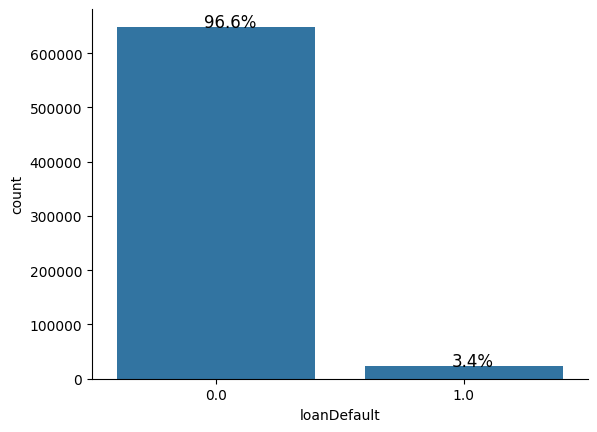

In [32]:
#Visualize 'loanDefault' using countplot.
ax = sns.countplot(x=approved_only['loanDefault'])
total = len(approved_only)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Show plot
sns.despine()
plt.show()

Massive data imbalance with 3.4% of positive class (defaulted loan) only.

Re-assign the numerical features, categorical features and other features again.

In [33]:
categ_feature = [num for num in approved_only.columns if approved_only[num].dtypes == "O" or approved_only[num].dtypes == "bool"]
numeric_feature = [num for num in approved_only.columns if approved_only[num].dtypes != "O"]
print(categ_feature, len(categ_feature), numeric_feature, len(numeric_feature))

['payFrequency', 'originated', 'state', 'leadType', 'fpStatus', 'isCollection', 'paymentStatus', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict', '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk', '.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother', '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified', '.u

In [34]:
print('Number of NaN in this dataset is',approved_only[categ_feature].isna().sum().sum())

Number of NaN in this dataset is 0


In [35]:
print('Number of NaN in this dataset is',approved_only[numeric_feature].isna().sum().sum())

Number of NaN in this dataset is 0


# Feature Analysis

### Correlation Heatmap for Numerical Features

Plot a correlation heatmap on the numerical features of the dataset.

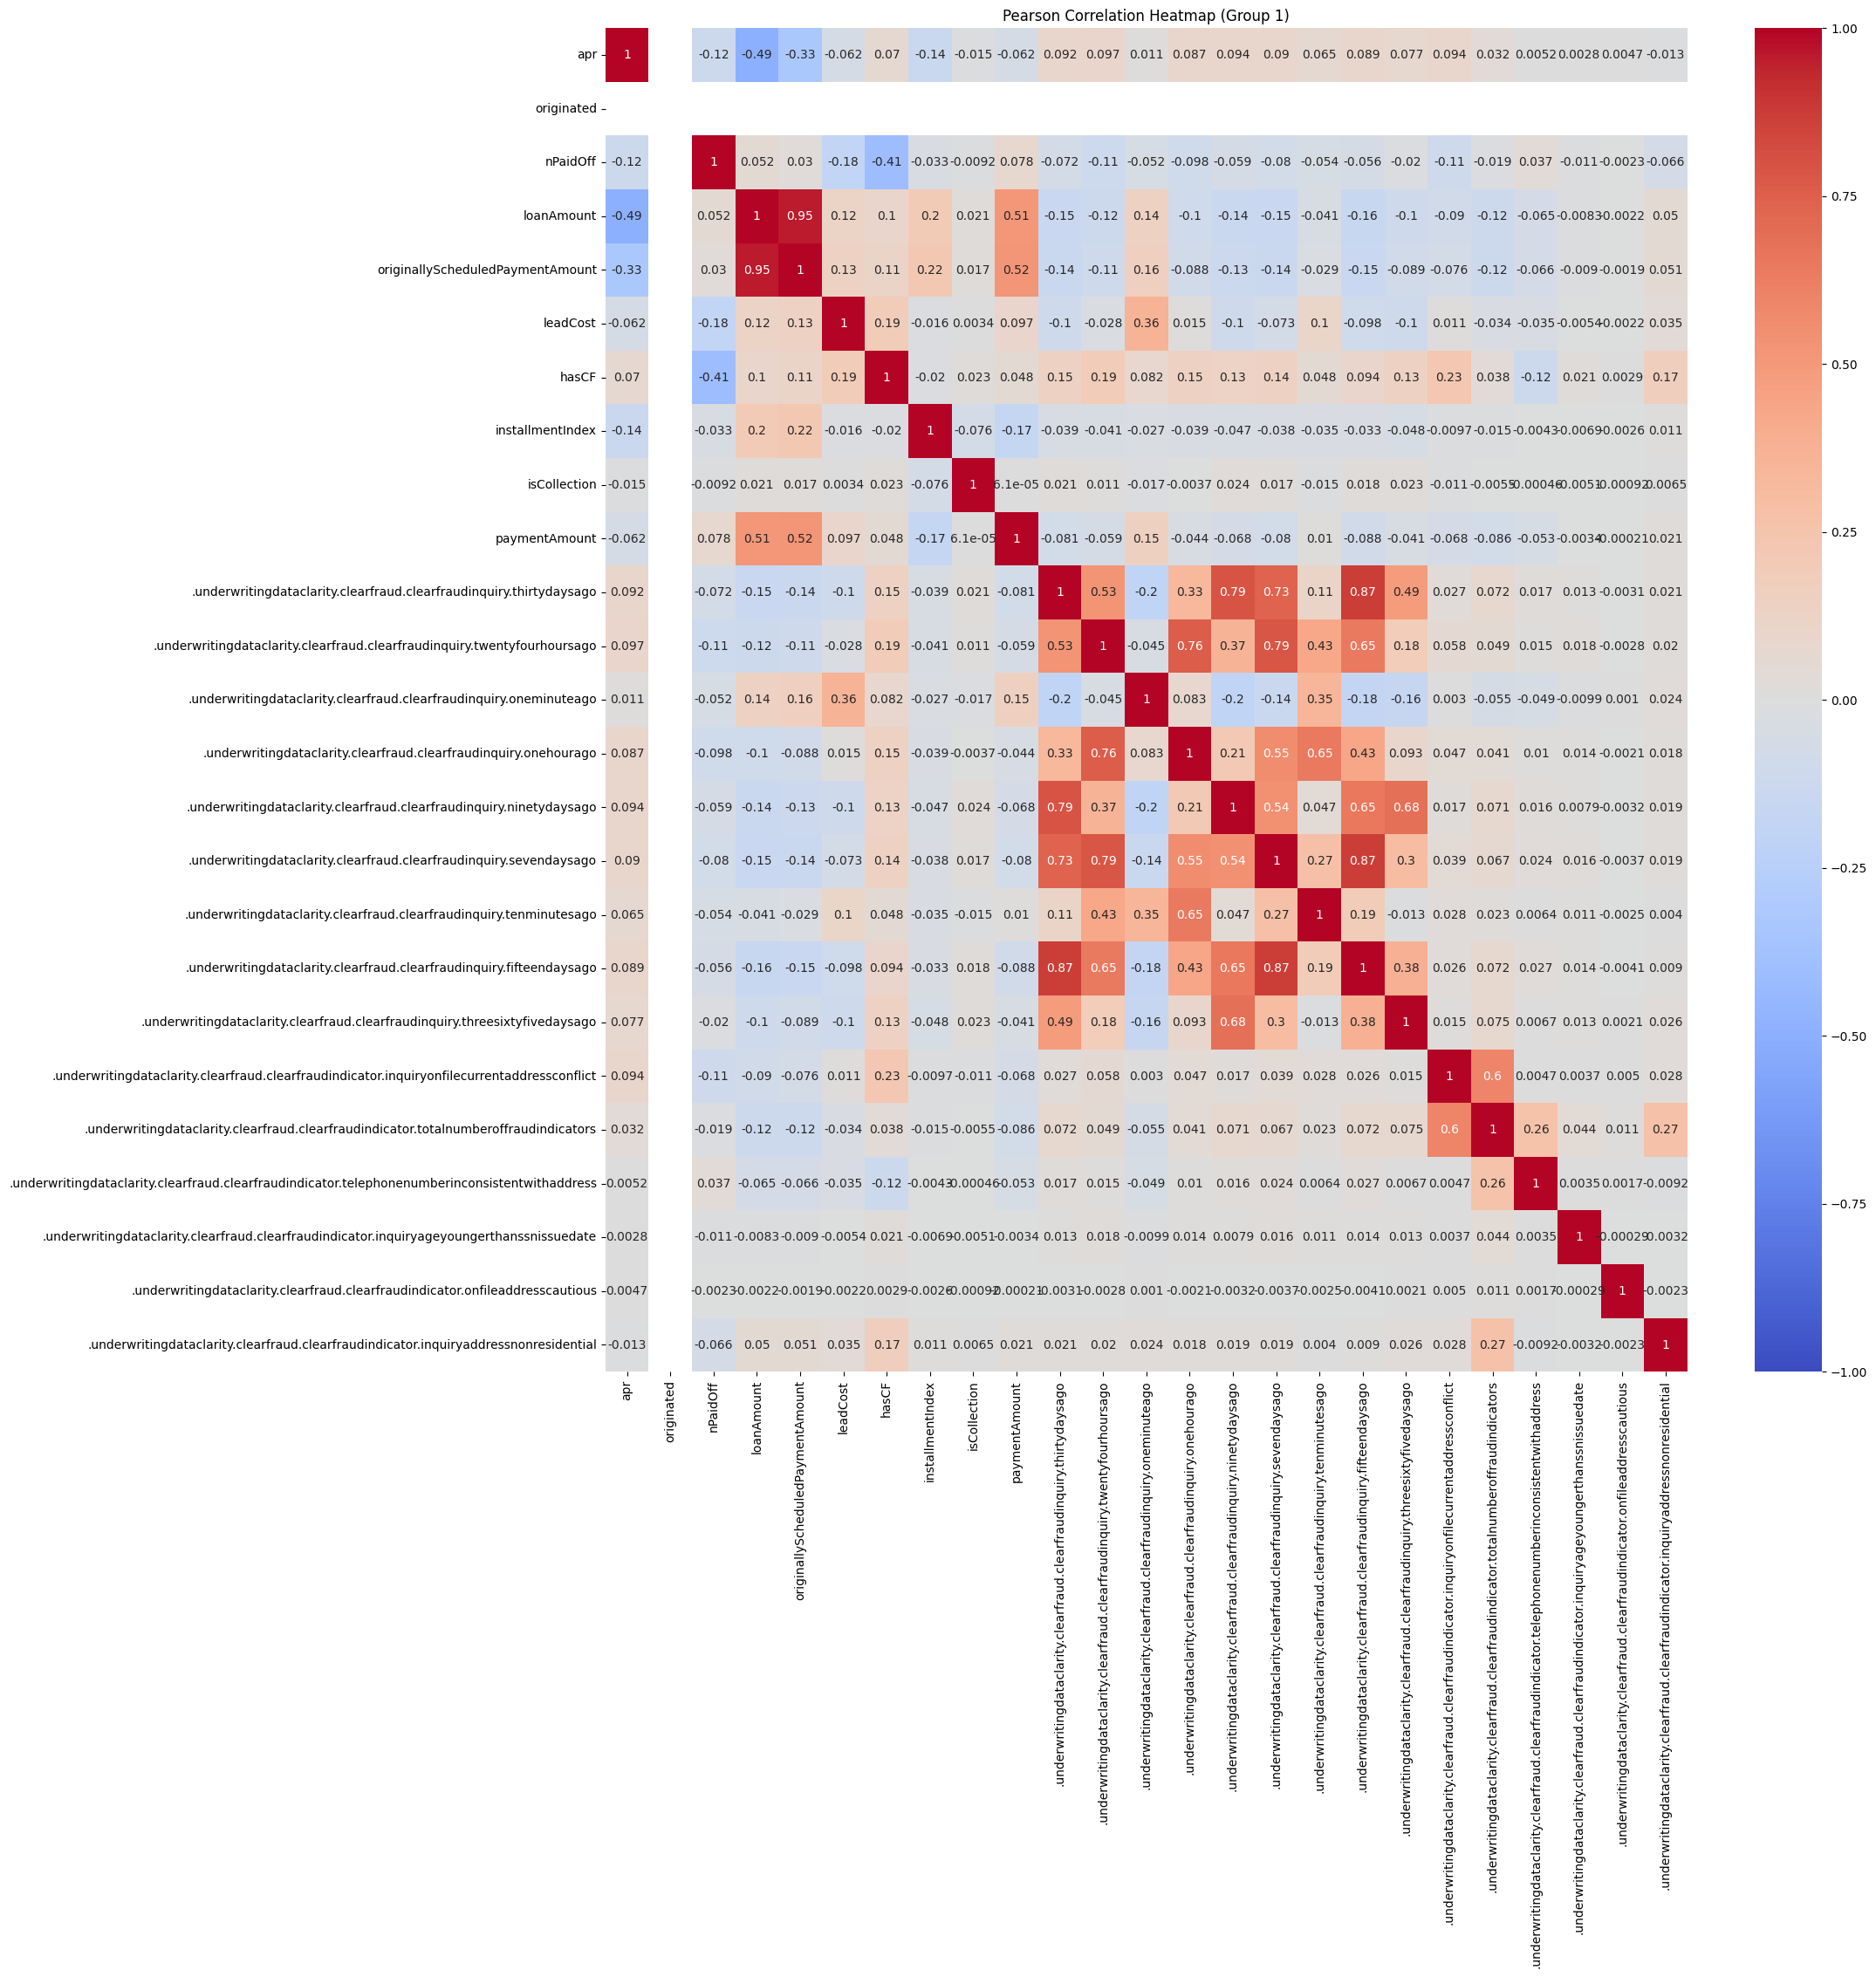

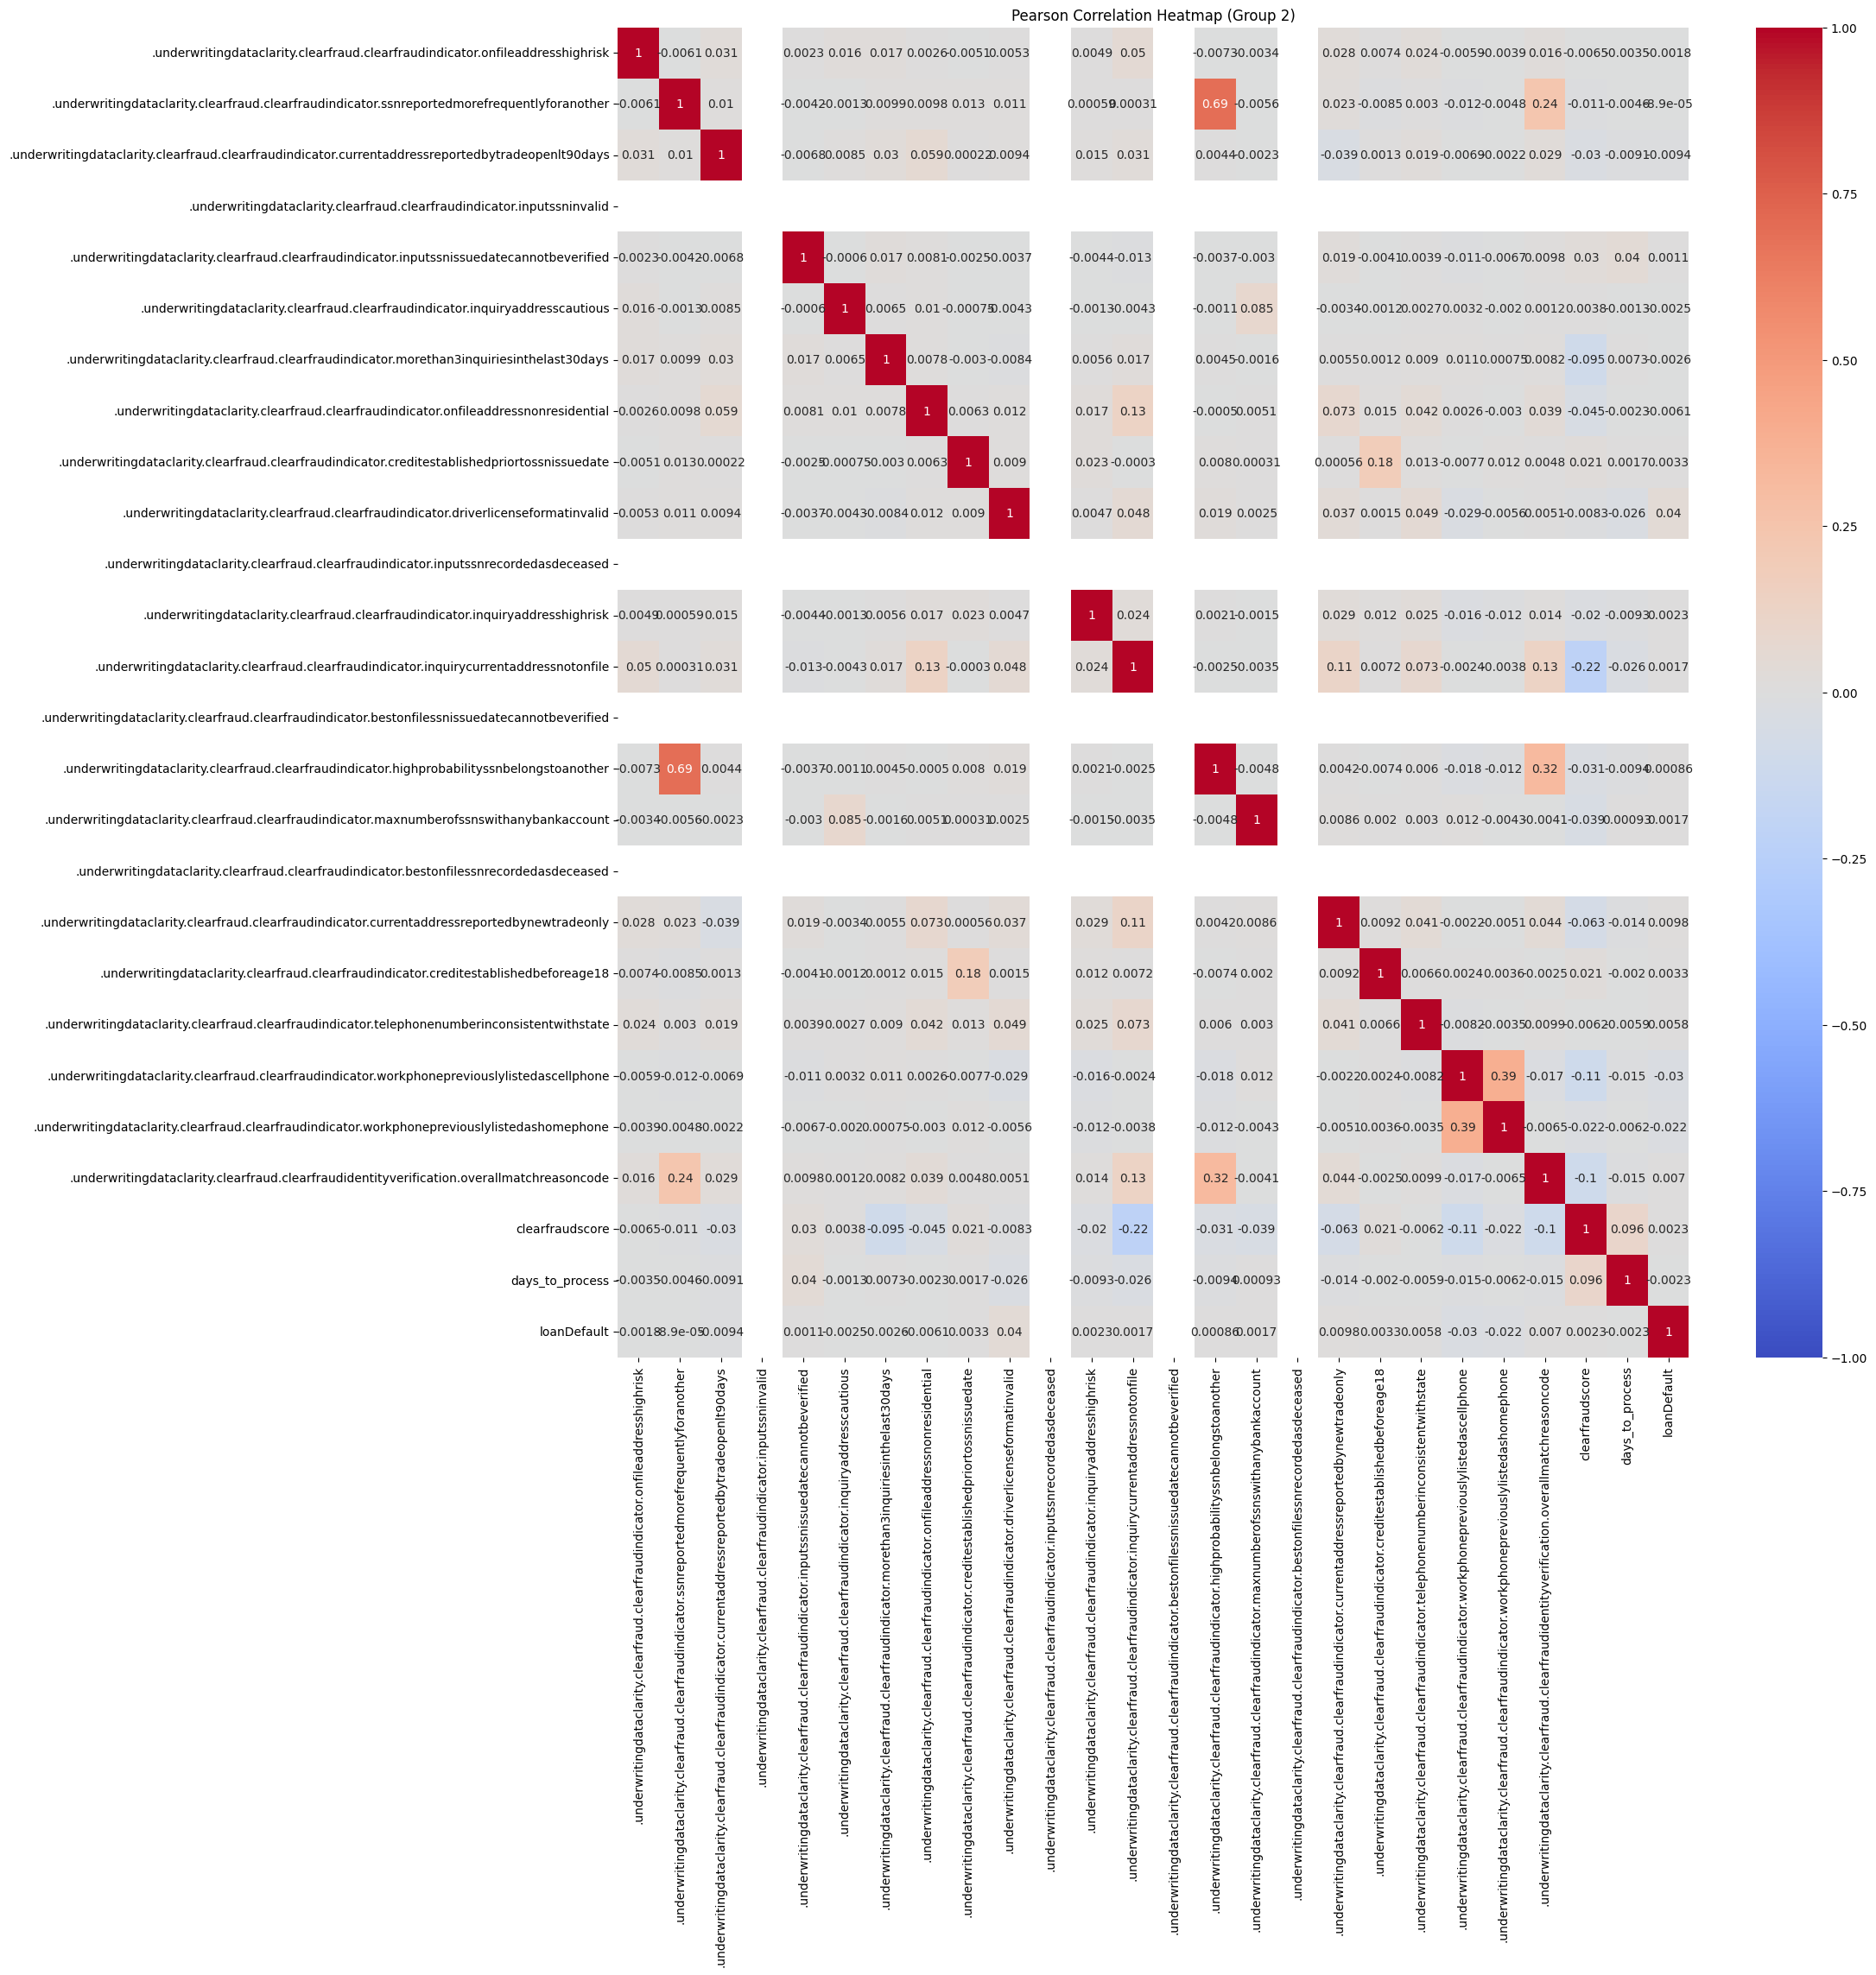

In [36]:
# Get the number of numeric features
num_features = len(approved_only[numeric_feature].columns)

# Divide the features into two groups to plot 2 heatmaps
mid_idx = num_features // 2
features_group1 = approved_only[numeric_feature].columns[:mid_idx]
features_group2 = approved_only[numeric_feature].columns[mid_idx:]

# Compute the correlation matrices for each group
corr_matrix_group1 = approved_only[numeric_feature][features_group1].corr()
corr_matrix_group2 = approved_only[numeric_feature][features_group2].corr()

# Plot the heatmaps for each group
plt.figure(figsize=(20, 20))
plt.title('Pearson Correlation Heatmap (Group 1)')
sns.heatmap(corr_matrix_group1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(20, 20))
plt.title('Pearson Correlation Heatmap (Group 2)')
sns.heatmap(corr_matrix_group2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [37]:
# Find pairs of features with correlation greater than 0.9 (excluding self-correlation)
high_corr_pairs = {}

#correlation group 1:
for i in range(len(corr_matrix_group1.columns)):
    for j in range(i):
        if abs(corr_matrix_group1.iloc[i, j]) > 0.9:
            high_corr_pairs[(corr_matrix_group1.columns[i], corr_matrix_group1.columns[j])] = corr_matrix_group1.iloc[i, j]

#correlation group 2:
for i in range(len(corr_matrix_group2.columns)):
    for j in range(i):
        if abs(corr_matrix_group2.iloc[i, j]) > 0.9:
            high_corr_pairs[(corr_matrix_group2.columns[i], corr_matrix_group2.columns[j])] = corr_matrix_group2.iloc[i, j]

high_corr_pairs

{('originallyScheduledPaymentAmount', 'loanAmount'): 0.953460682706045}

* According to the heatmaps, 'originallyScheduledPaymentAmount' and 'loanAmount' are highly correlated with each others with correlation of 0.95. (multicollinearity issues)
* I will run a round of random forest model first, and check the feature importance score. The features ('originallyScheduledPaymentAmount' or 'loanAmount') with higher score will be kept and the lower score feature will be dropped.

# Data Pre-processing - Standardizing and Encoding the Features

### Standarizing the numerical columns using RobustScaler.

RobustScaler can maintains spread of data and robust to outliers.

In [38]:
from sklearn.preprocessing import RobustScaler

# Create an instance of RobustScaler
scaler = RobustScaler()

# Fit the scaler to the numerical columns and transform them
scaled_values = scaler.fit_transform(approved_only[numeric_feature])

# Replace the original numerical columns with the scaled values
approved_only[numeric_feature] = scaled_values

### Encode Categorical Features using one-hot-encoding.

One-Hot-Encoding encodes the categorical features without inrehently learning the underlying ranking, and avoiding bias. 
The pitfall of the method is the dimensionality of the dataset increases.

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# fit the encoder to the data and transform the data
encoded_data = encoder.fit_transform(approved_only[categ_feature])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categ_feature))

approved_only.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Drop the original categorical features from the approved_only DataFrame
approved_only.drop(columns=categ_feature, inplace=True)

# Concatenate the encoded DataFrame with the approved_only DataFrame
approved_only = pd.concat([approved_only, encoded_df], axis=1)

# Display the first few rows of the encoded data
print(approved_only.head())

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        apr  nPaidOff  loanAmount  originallyScheduledPaymentAmount  leadCost  \
0 -2.428571       0.0    7.692308                          4.885167      -0.3   
1 -2.428571       0.0    7.692308                          4.885167      -0.3   
2 -2.428571       0.0    7.692308                          4.885167      -0.3   
3 -2.428571       0.0    7.692308                          4.885167      -0.3   
4 -2.428571       0.0    7.692308                          4.885167      -0.3   

   hasCF  installmentIndex  paymentAmount  \
0    0.0         -0.888889       2.304926   
1    0.0         -0.777778       2.304926   
2    0.0         -0.666667       2.304926   
3    0.0         -0.555556       2.304926   
4    0.0         -0.444444       2.304926   

   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                               -0.5                     
1                                               -0.5                     
2                   

In [40]:
print('Number of NaN in this dataset is',approved_only.isna().sum().sum())

Number of NaN in this dataset is 0


# Prepare the Dataset for Training Machine Learning Models

In [41]:
#Assign approved_only data to a dataset.
final_data = approved_only

In [42]:
final_data.head()

apr  nPaidOff  loanAmount  originallyScheduledPaymentAmount  leadCost  \
0 -2.428571       0.0    7.692308                          4.885167      -0.3   
1 -2.428571       0.0    7.692308                          4.885167      -0.3   
2 -2.428571       0.0    7.692308                          4.885167      -0.3   
3 -2.428571       0.0    7.692308                          4.885167      -0.3   
4 -2.428571       0.0    7.692308                          4.885167      -0.3   

   hasCF  installmentIndex  paymentAmount  \
0    0.0         -0.888889       2.304926   
1    0.0         -0.777778       2.304926   
2    0.0         -0.666667       2.304926   
3    0.0         -0.555556       2.304926   
4    0.0         -0.444444       2.304926   

   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                               -0.5                     
1                                               -0.5                     
2                                               -0.5                     
3                                               -0.5                     
4                                               -0.5                     

   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                0.0                          
1                                                0.0                          
2                                                0.0                          
3                                                0.0                          
4                                                0.0                          

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription_(U) Unlisted  \
0                                                0.0                                                           
1                                                0.0                                                           
2                                                0.0                                                           
3                                                0.0                                                           
4                                                0.0                                                           

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult_match  \
0                                                0.0                                             
1                                                0.0                                             
2                                                0.0                                             
3                                                0.0                                             
4                                                0.0                                             

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult_mismatch  \
0                                                0.0                                                
1                                                0.0                                                
2                                                0.0                                                
3                                                0.0                                                
4                                                0.0                                                

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult_other  \
0                                                0.0                                             
1                                                0.0                                             
2                                                0.0                                             
3       

In [43]:
print('Number of NaN in this dataset is', final_data.isna().sum().sum())

Number of NaN in this dataset is 0


# Machine Learning Model Part

## Performance Metric to Consider

In this dataset, load default rate is only 3.4 %, whereas the rest pay off the loan. Hence, it is massively imbalanced dataset. 

Assuming that the positive class is "default" (loanDefault = 1) and the negative class is "no default"  (loanDefault = 0) :

* Type I error (false-positive):
    - The probability of the model predicting a loan will default when it actually doesn't.
    - Consequence: The loan will be rejected. Potential loss of business and profit from the interest rate.Risk of losing incurred by MoneyLIon is insignificant.

* Type II error (false-negative):
    - The probability of the model predicting a loan will not default when it actually does.
    - Consequence: MoneyLion incurs the losses if the model wrongly detects a default loan as payoff loan.

Consequence of Type II error (false-negative) is more costly than Type I error (false-positive).

In an imbalanced dataset, accuracy alone is not a reliable metric to evaluate the model's performance because it can be misleading. Thefore, it is essential to consider other performance metrics such as precision, recall and F1-score:

* Precision
    - It is the proportion of true positives (defaulted loans) among all positive predictions (both true positives and false positives). 
    - A high precision means that the model is able to correct indentify a significant proportion of defaulted loans among all the loans it predicts will default.
    
* Recall
    - It measures the proportion of actual positives (defaulted loans) that the model correctly identified as positives. 
    - Recall indicates how well the model is capturing the positive class.
    - It is important in our case where false negatives (not detecting a default when there is one) are more costly than false positives (detecting a default when there is none).

* F1-Score
    - It combines the precision and recall scores of a model 
    - The F1-score is useful in imbalanced dataset as it considers both the false positives and false negatives.

We need to look at different performance metrics of the model to get more comprehensive evaluation of the model's performance. For example, recall alone would result in the model is able to captures many of the positive cases (defauled loan) but also produces a large number of false positives (detecting a default when there is none), which can be costly to MoneyLion.

Therefore, this project will consider 3 performance metrics - recall, precision and f1-score in order to ensure the model is not only detecting defaulted loan, but is also predicting defaulted loan accurately.

## Building Classification Machine Learning Model

Random Forest Classifier will be used as classification machine learning models. The reasons are:
* RF is able to handle multicollinearity better. The model can decide which of the correlated features to split on at various nodes.
* RF has an parameter option (class_weight='balanced') that can directly address class imbalances during training, which is suitable in our case.

Building ML models involves these steps:
* Split the dataset into training (80%) and testing (20%) sets.
* use SMOTE (Synthetic Minority Over-sampling Technique) to balance the imbalanced dataset.
* Use 8-fold cross-validation on the training data.
* Show performance metric of recall, precision and f1-score.
* Plot the confusion matrix to look at the number of FP, TP, FN, etc.

After building first RF model, plot the features importance score graph, then remove features with 0 importance scores.

### Random Forest Classifier

[[129637     49]
 [   732   3959]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    129686
         1.0       0.99      0.84      0.91      4691

    accuracy                           0.99    134377
   macro avg       0.99      0.92      0.95    134377
weighted avg       0.99      0.99      0.99    134377



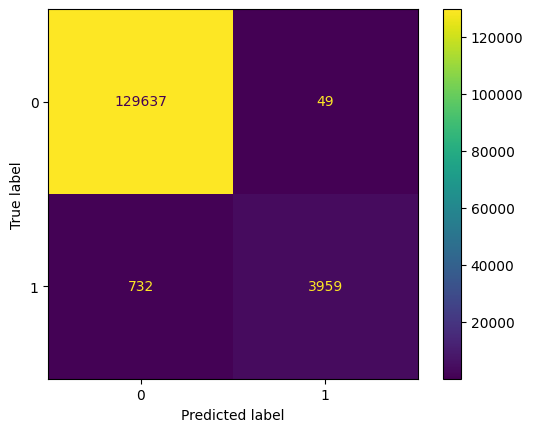

In [44]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the dataset into training and testing sets
X = final_data.drop('loanDefault', axis=1)
y = final_data['loanDefault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Perform 8-fold cross-validation on the training data
scores = cross_val_score(rfc, X_train, y_train, cv=8)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predict the target variable for the test data
y_pred = rfc.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the confusion matrix
labels = ['0', '1']

# Plot the confusion matrix with labels and ticks
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp = disp.plot(include_values=True,  ax=ax, xticks_rotation='horizontal')
plt.show()

Result of Random Forest:
* Precision = 99%
* Recal = 92%
* F1-Score = 95%

I look at values of Macro Average because it provides the performance of RF for both classes, treating them equally, especially looking at minority class (default loan).

Define a function to plot feature importance scores graph. Split the graph into 2 due to huge number of features. And print out features with 0 value of feature importance score.

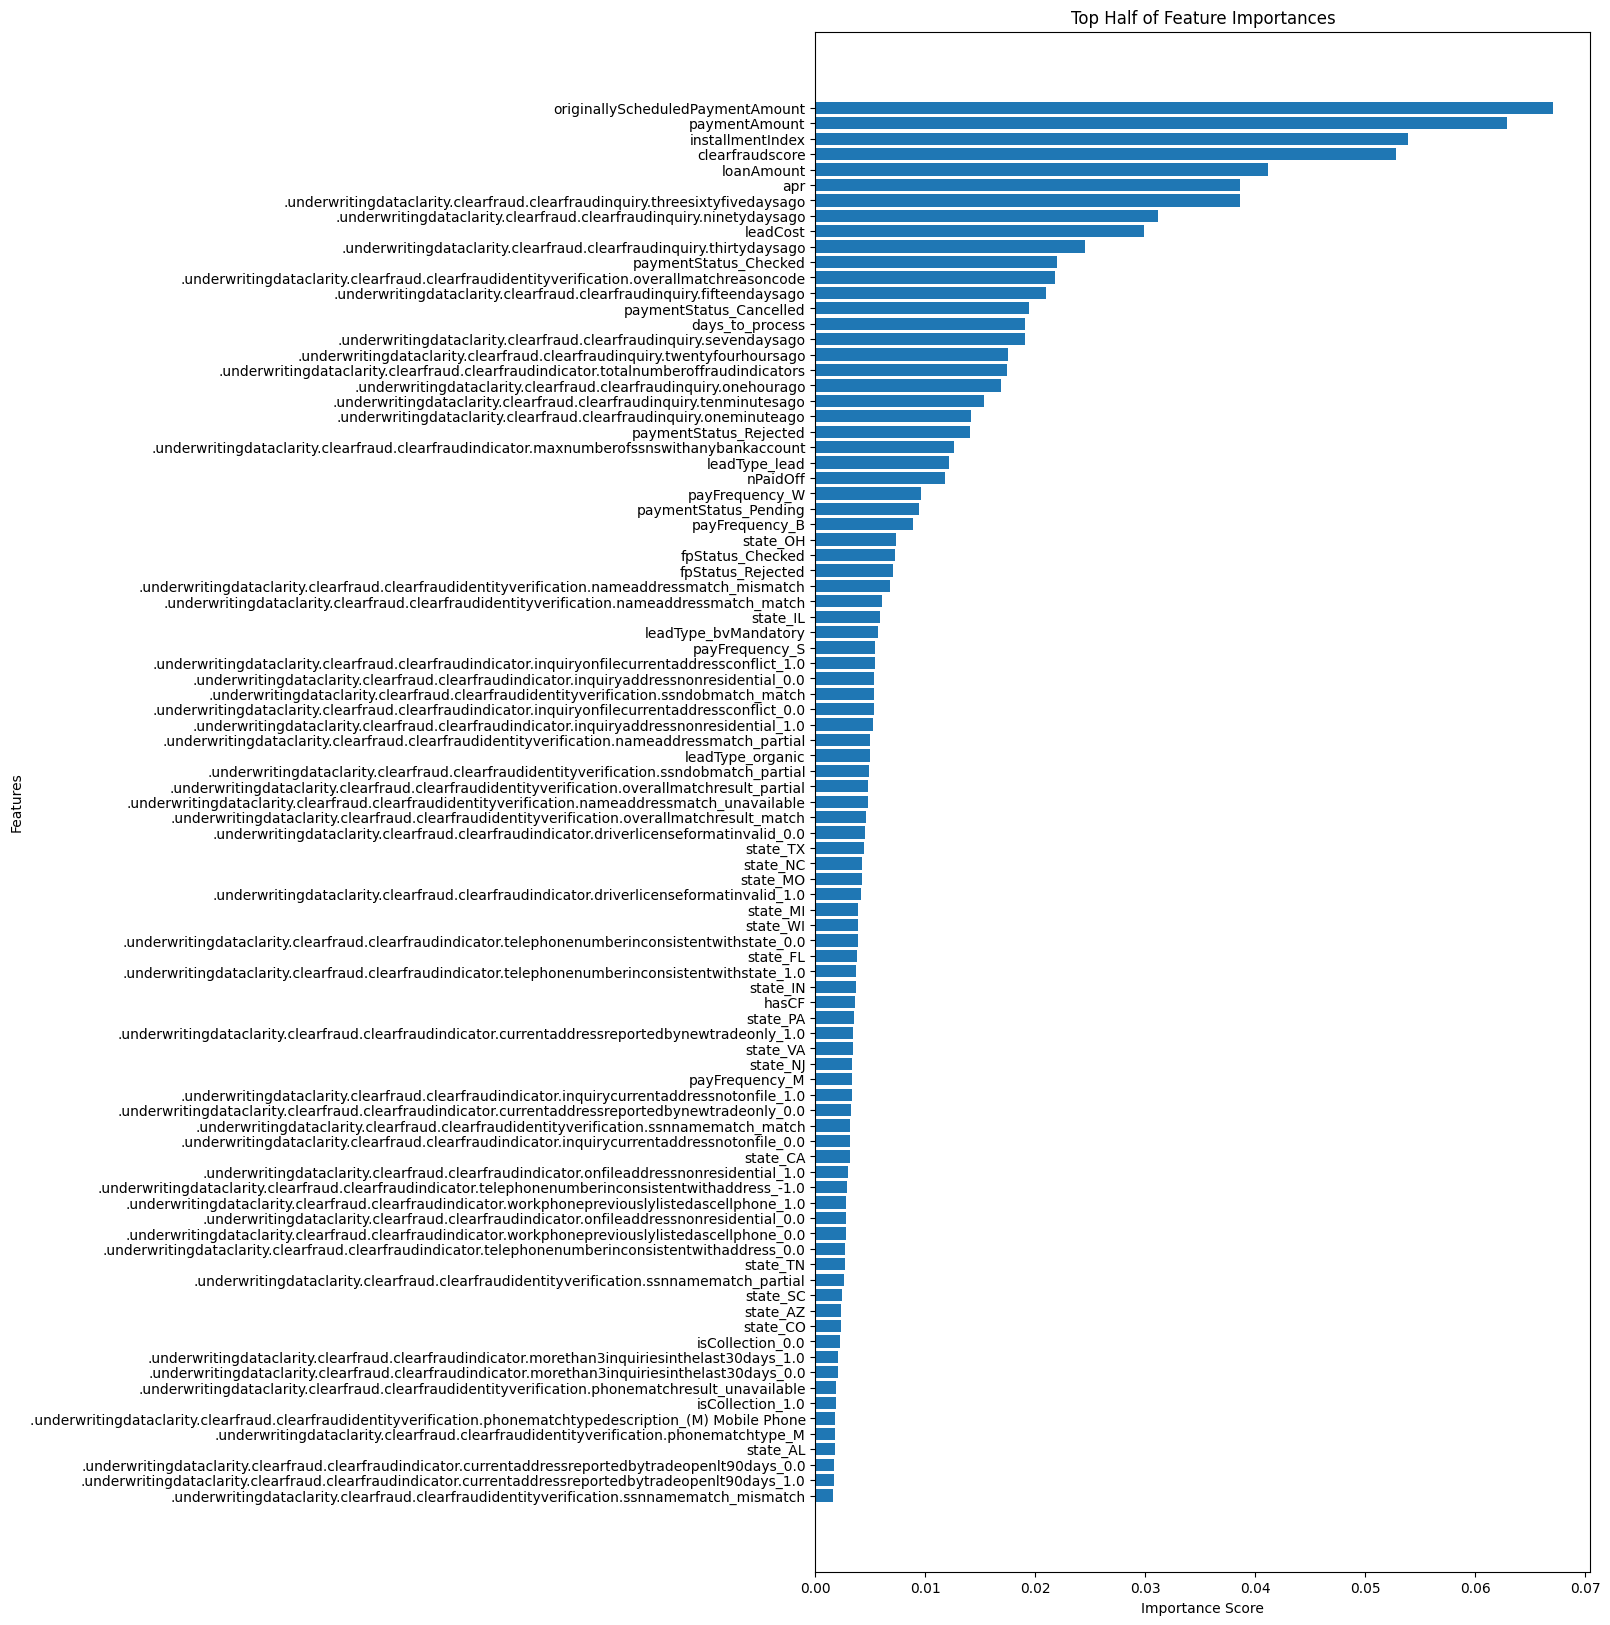

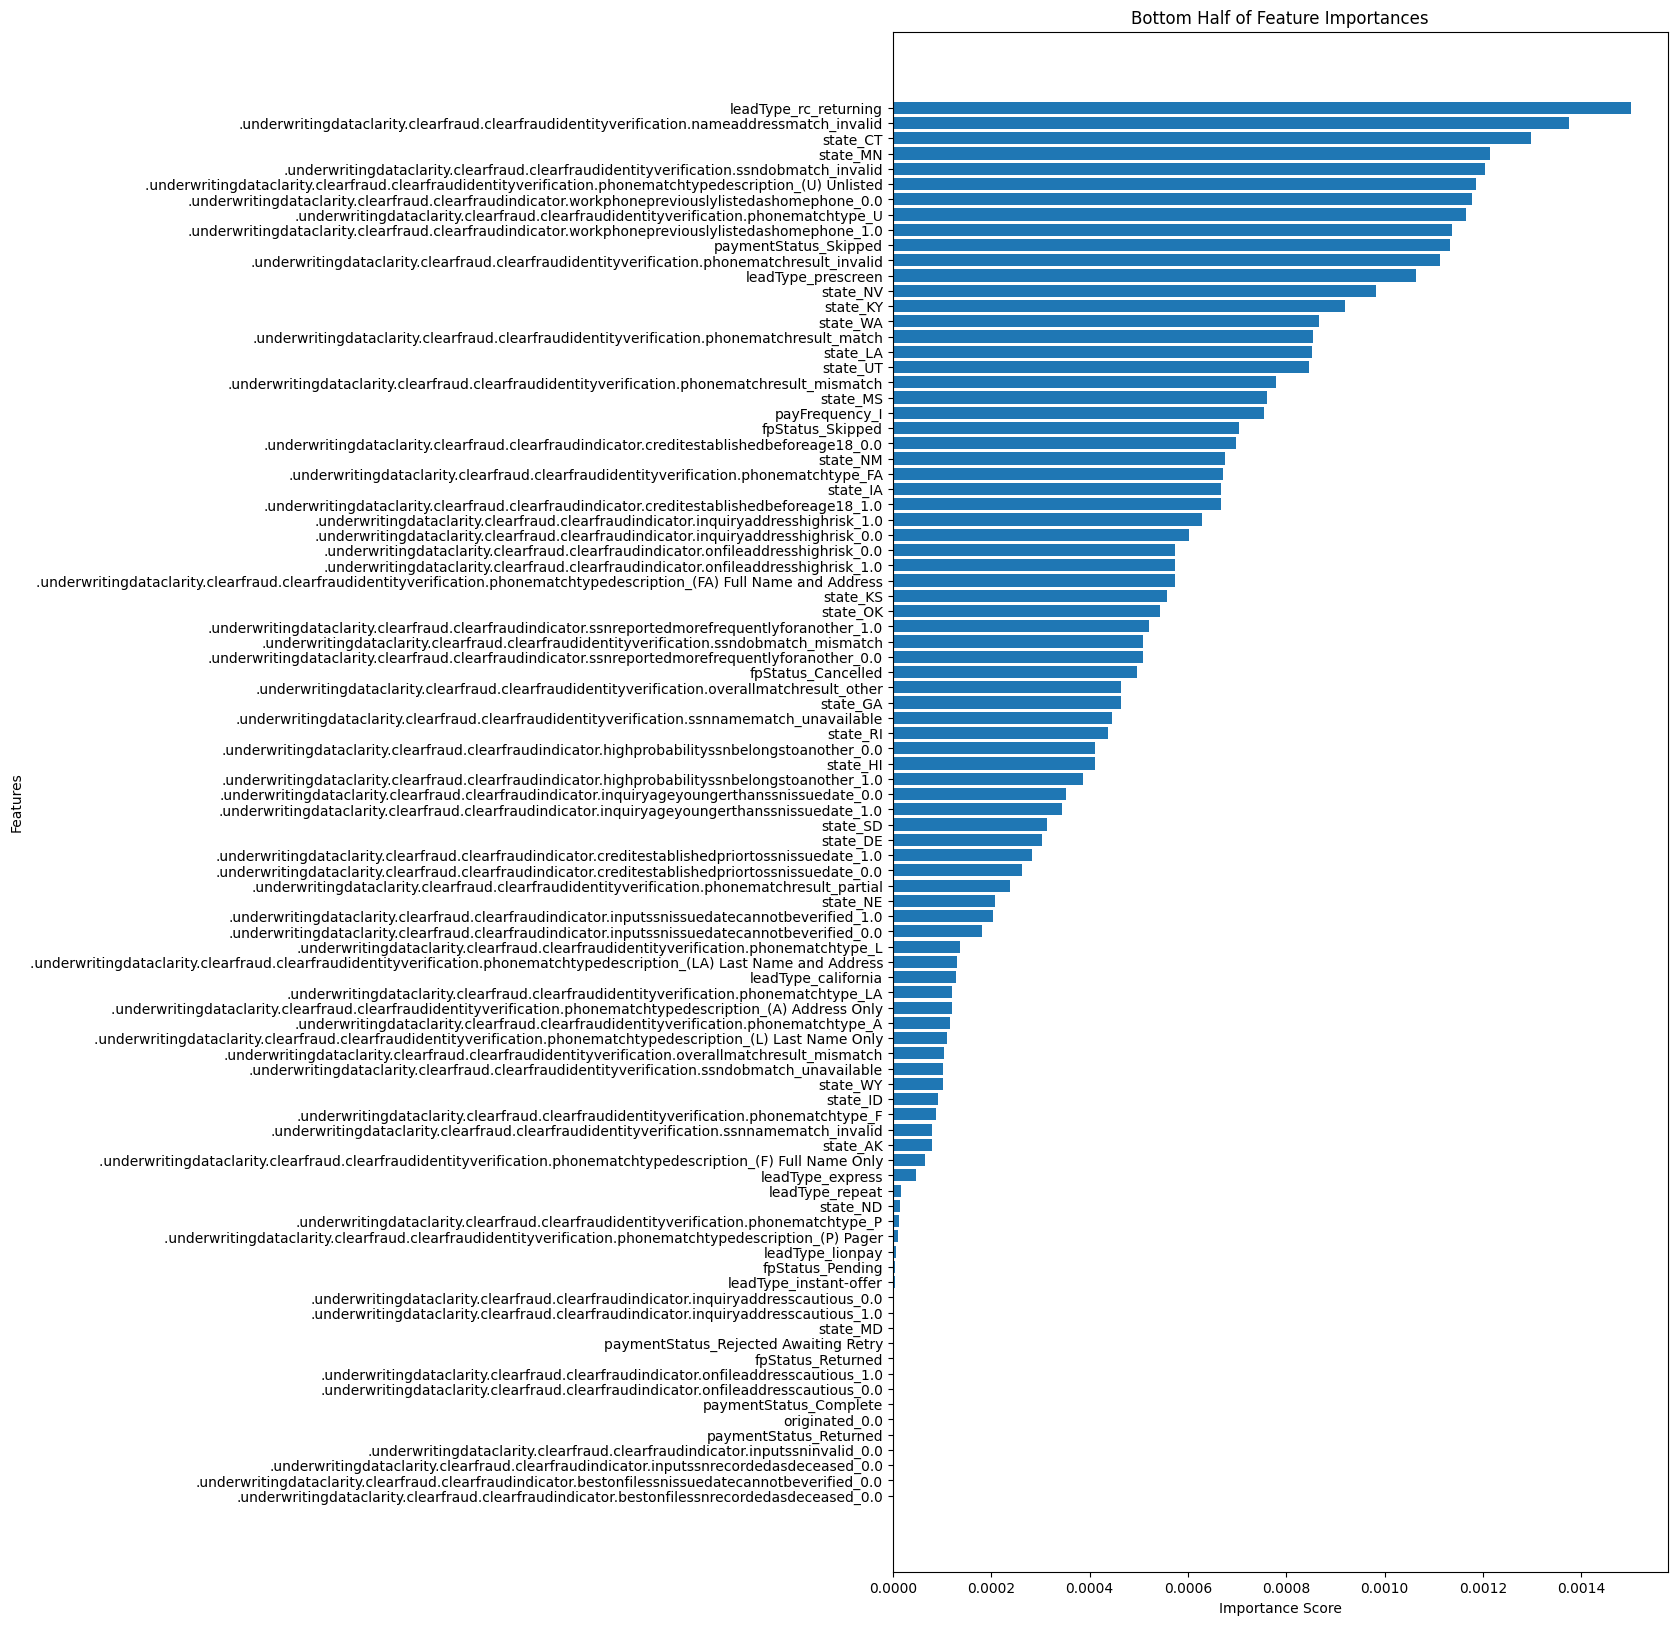

There are 6 features with an importance score of 0: ['originated_0.0', 'paymentStatus_Returned', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid_0.0', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased_0.0', '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified_0.0', '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased_0.0']


In [45]:
def plot_feature_importances(feature_importances, features):
    
    # Pair each feature name with its importance score
    feature_importance_pairs = list(zip(features, feature_importances))

    # Sort the features by importance
    sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
    sorted_features = [pair[0] for pair in sorted_feature_importance_pairs]
    sorted_importances = [pair[1] for pair in sorted_feature_importance_pairs]

    # Split the features and importances into two halves
    mid_idx = len(sorted_features) // 2
    top_features = sorted_features[:mid_idx]
    top_importances = sorted_importances[:mid_idx]

    bottom_features = sorted_features[mid_idx:]
    bottom_importances = sorted_importances[mid_idx:]

    # Plot the top half of the feature importances
    plt.figure(figsize=(10, 20))
    plt.barh(top_features, top_importances)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Top Half of Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

    # Plot the bottom half
    plt.figure(figsize=(10, 20))
    plt.barh(bottom_features, bottom_importances)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Bottom Half of Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

    #This section print out features with 0 importance score
    # Pair each feature name with its importance score
    feature_importance_pairs = list(zip(features, feature_importances))

    # Convert the pairs into a DataFrame
    feature_importance_df = pd.DataFrame(feature_importance_pairs, columns=['Feature', 'Importance'])

    # Filter and print the features with an importance score of 0
    zero_importance_features = feature_importance_df[feature_importance_df['Importance'] == 0]['Feature'].tolist()
    
    print(f'There are {len(zero_importance_features)} features with an importance score of 0:',zero_importance_features)
    
    return zero_importance_features
    
# call the function and assign it to zero_features to store the zero_importance_features
zero_features = plot_feature_importances(rfc.feature_importances_, list(X.columns))

* As mentioned in Feature Analysis, I identified 2 multicollinear features ("originallyScheduledPaymentAmount" and "loanAmount") from the correlation heatmap.
* According to the feature importance score plot, "originallyScheduledPaymentAmount" ranked the first whereas "loanAmount" ranked the 5th.
* Given that high correlation between these 2 features, it could imply that much of the information in 'loanAmount' was already captured by 'originallyscheduledpaymentamount'.
* Thus, "loanAmount" will be dropped.
* Furthermore, there is a number of features with importance score of 0. They will be dropped as well to run another round of training.

Drop 'loanAmount':

In [46]:
#Drop loanamount 
final_data = final_data.drop('loanAmount', axis=1)

Drop the features with zero importance score:

In [47]:
#Drop zero importance score 
final_data = final_data.drop(zero_features, axis=1)
final_data.head()

apr  nPaidOff  originallyScheduledPaymentAmount  leadCost  hasCF  \
0 -2.428571       0.0                          4.885167      -0.3    0.0   
1 -2.428571       0.0                          4.885167      -0.3    0.0   
2 -2.428571       0.0                          4.885167      -0.3    0.0   
3 -2.428571       0.0                          4.885167      -0.3    0.0   
4 -2.428571       0.0                          4.885167      -0.3    0.0   

   installmentIndex  paymentAmount  \
0         -0.888889       2.304926   
1         -0.777778       2.304926   
2         -0.666667       2.304926   
3         -0.555556       2.304926   
4         -0.444444       2.304926   

   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                               -0.5                     
1                                               -0.5                     
2                                               -0.5                     
3                                               -0.5                     
4                                               -0.5                     

   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                0.0                          
1                                                0.0                          
2                                                0.0                          
3                                                0.0                          
4                                                0.0                          

   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  ...  \
0                                                0.5                   ...   
1                                                0.5                   ...   
2                                                0.5                   ...   
3                                                0.5                   ...   
4                                                0.5                   ...   

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription_(U) Unlisted  \
0                                                0.0                                                           
1                                                0.0                                                           
2                                                0.0                                                           
3                                                0.0                                                           
4                                                0.0                                                           

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult_match  \
0                                                0.0                                             
1                                                0.0                                             
2                                                0.0                                             
3                                                0.0                                             
4                                                0.0                                             

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult_mismatch  \
0                                                0.0                                                
1                                                0.0                                                
2                                                0.0                                                
3                                                0.0                                                
4                                                0.0                                                

   .underwritingdataclarity.clearfraud.clearfraudidentityverific

Train new round of RF model without 'loanAmount' and zero importance score features:

[[129618     68]
 [   749   3942]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    129686
         1.0       0.98      0.84      0.91      4691

    accuracy                           0.99    134377
   macro avg       0.99      0.92      0.95    134377
weighted avg       0.99      0.99      0.99    134377



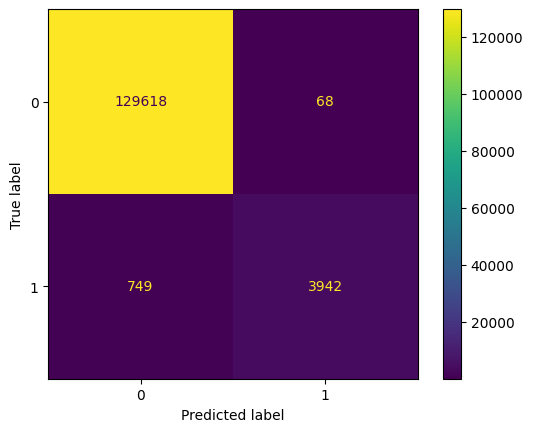

In [48]:
# Split the dataset again into training and testing sets
X = final_data.drop('loanDefault', axis=1)
y = final_data['loanDefault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Perform 8-fold cross-validation on the training data
scores = cross_val_score(rfc, X_train, y_train, cv=8)

rfc.fit(X_train, y_train) # Train the classifier on the training data

y_pred = rfc.predict(X_test) # Predict the target variable for the test data

# print the performance metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred = rfc.predict(X_test) # Predict the target variable for the test data

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the confusion matrix
labels = ['0', '1']

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp = disp.plot(include_values=True,  ax=ax, xticks_rotation='horizontal')
plt.show()

Result of Random Forest:
* Precision = 99%
* Recall = 92%
* F1-Score = 95%

After removing 'loanAmount' and features with zero importance scores, the performance of the model remains the same.

Plot the feature importance score:

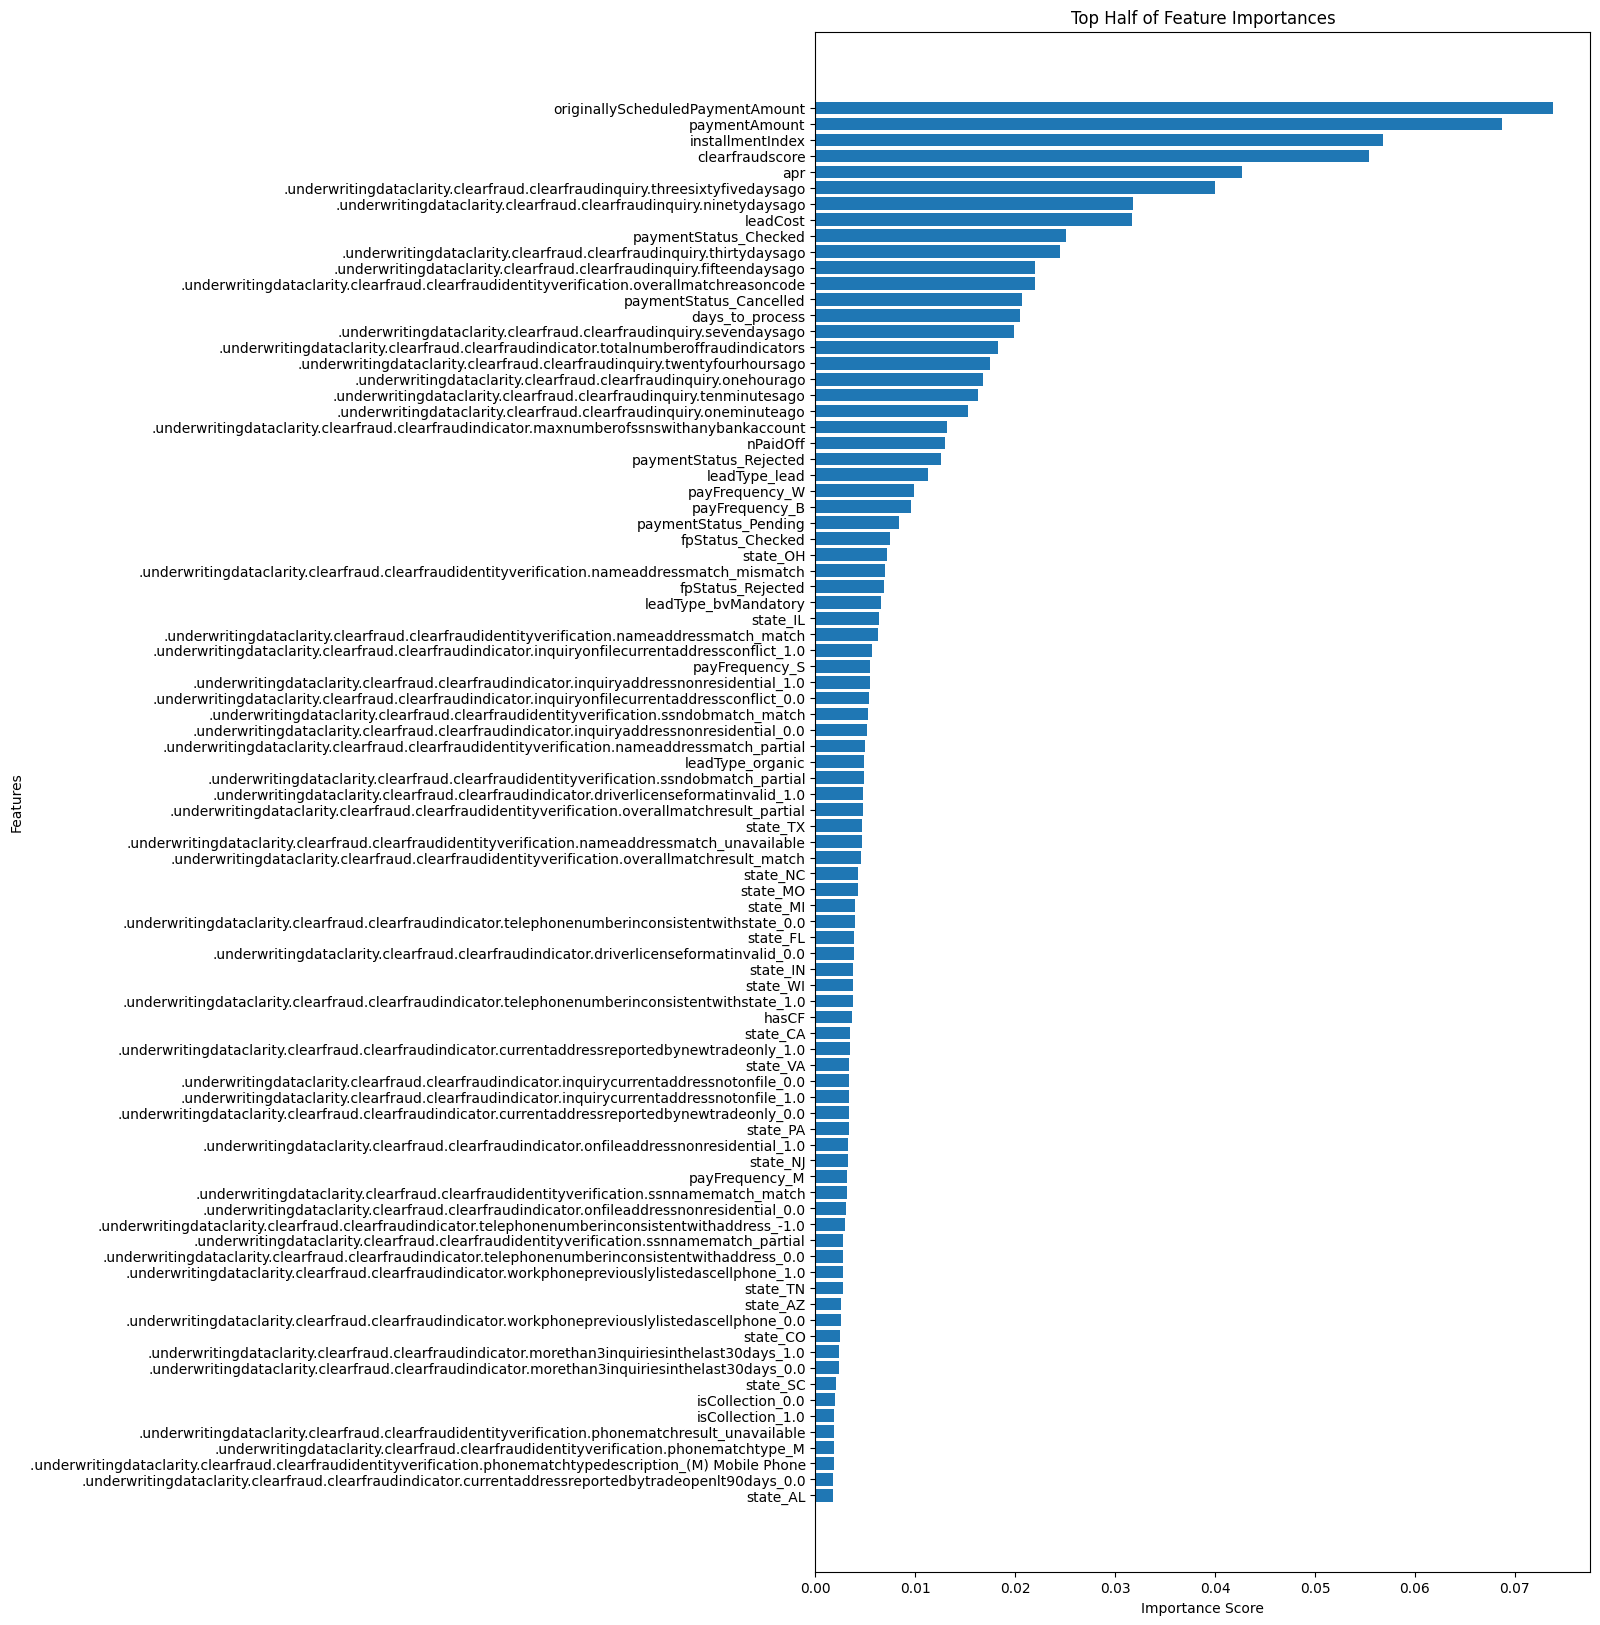

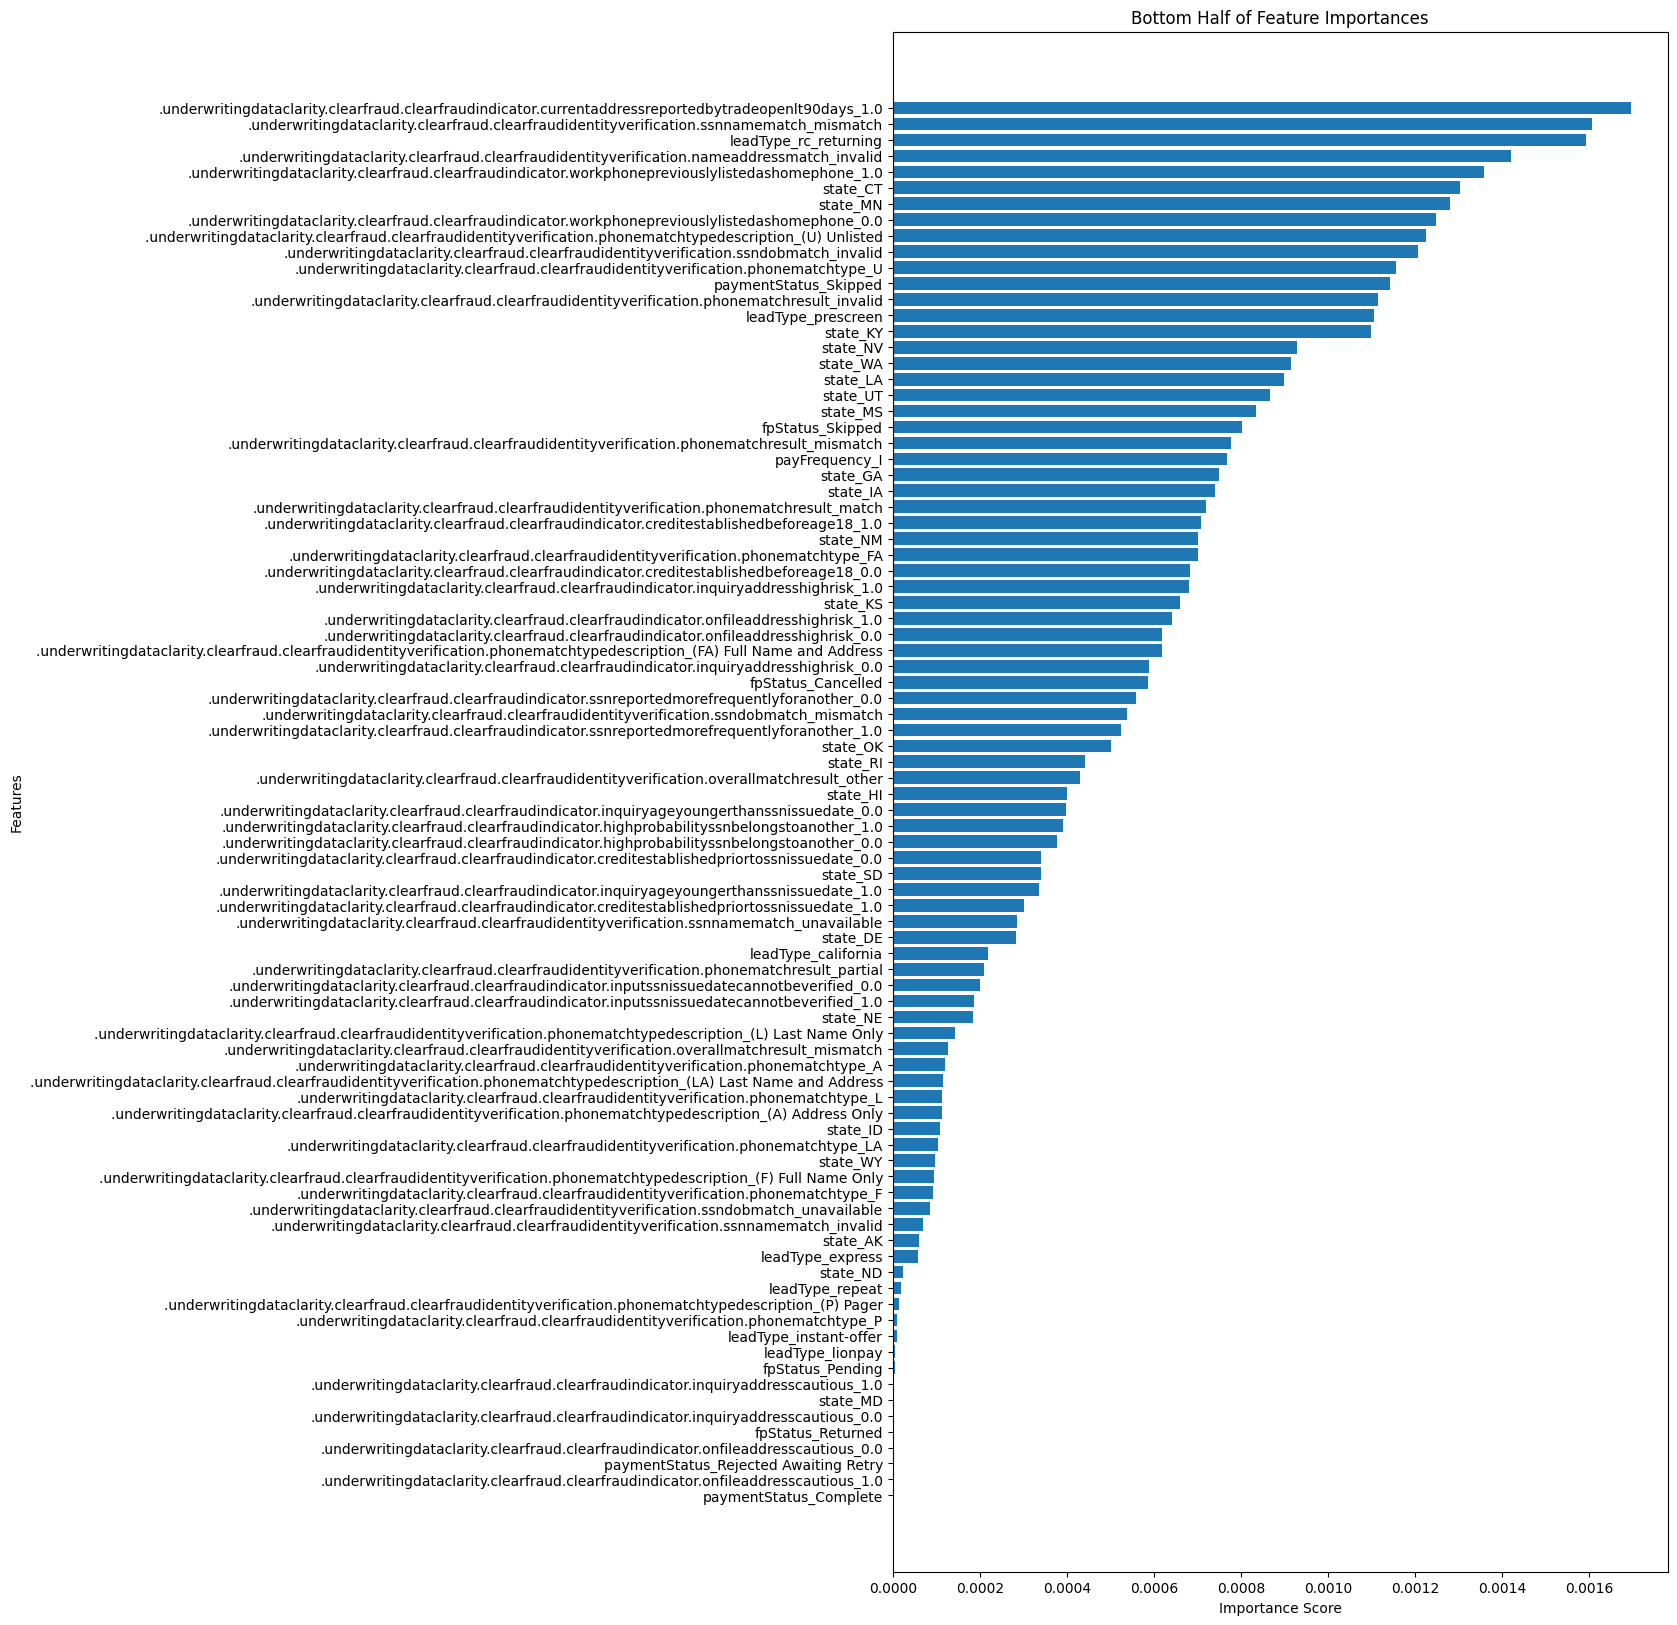

There are 0 features with an importance score of 0: []


In [49]:
zero_features_1 = plot_feature_importances(rfc.feature_importances_, list(X.columns))

# Conclusion

| Random Forest | Recall | Precision | F1-Score |
| --- |  --- | --- | --- |
| With 'loanAmount' | 92% | 99% | 95% |
| After dropping 'loanAmount' | 92% | 99% | 95% |

* The Random Forest model achieved exceptional high precision (99%) indicates that the model able to correctly indenfity a significant proportion of defaulted loans among all the loans it predicts will default.
* The model also achieved 92% of recall indicating the model is doing well in capturing the defaulted loan (positive class).
* According to the result, model is able to help MoneyLion to reduce the losses of low payback rate in approved loans.

However, if solely looking at the number of false negative (actual defaulted loan but the model predicted it as non-default) AKA Type-II error, the number of false negative increased around 2.3% after dropping the 'loanAmount'.

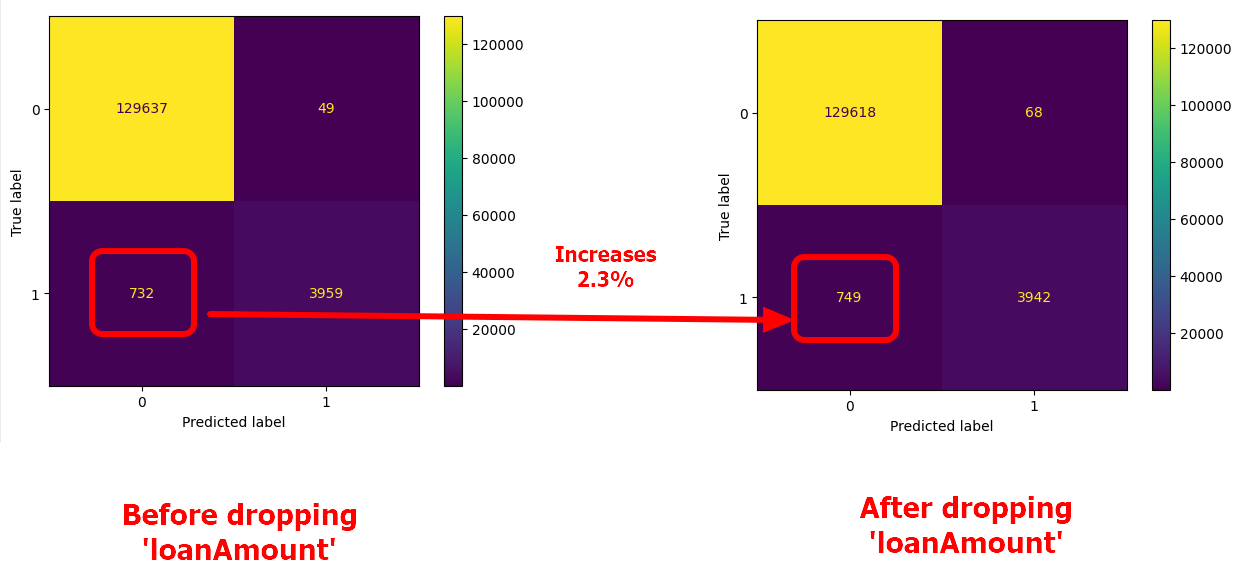

In [51]:
from IPython import display
display.Image("difference.png")

Given that the consequence of Type-II error is significant to MoneyLion as granting a loan to someone who ends up defaulting, resulting in a direct financial loss. 

Thus, the number of false negative should be as low as possible. 

Therefore, 'loanAmount' should not be dropped as it also provides some information to the target variable although it has high correlation to 'originallyscheduledpaymentamount'.